In [1]:
import os
import re
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def extract_dataset(config):
    # Extract the dataset name
    if 'MT-SMLM_registered' in config:
        used_dataset = 'MT-SMLM_registered'
    else:
        for d in os.listdir('../datasets'):
            if d in config:
                used_dataset = d
    return used_dataset

def extract_gt_path(config):
    # Extract the dataset name
    if 'MT-SMLM_registered' in config:
        used_dataset = 'MT-SMLM_registered'
    else:
        for d in os.listdir('../datasets'):
            if d in config:
                used_dataset = d

    # Find its test folder
    dataset_path = os.path.join('../datasets', used_dataset)
    for f in os.listdir(dataset_path):
        if 'test' in f:
            data_path = os.path.join(dataset_path, f)

    # If it is EM, there is no GT then return
    if used_dataset == 'EM':
        return data_path
    
    # Extract the GT folder
    for f in os.listdir(data_path):
        if 'gt' in f:
            final_path = os.path.join(data_path, f)

    # If it has levels take the highest one
    if 'level_01' in os.listdir(final_path):
        final_path = os.path.join(final_path, sorted(os.listdir(final_path))[-1])
        
    return final_path

def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-10)

def read_img(filename):
    return normalize(io.imread(filename))

# Extract all the configurations in the given folder

In [14]:
def get_config_path_list():
    root_path = './WGAN'
    config_list = []
    for add_folder_name in os.listdir(root_path):
        add_folder_path = os.path.join(root_path, add_folder_name)
        for dataset in os.listdir(add_folder_path):
            dataset_path = os.path.join(add_folder_path, dataset)
            for model_name in os.listdir(dataset_path):
                model_path = os.path.join(dataset_path, model_name)
                model_path = os.path.join(model_path, os.listdir(model_path)[0])
                for e in os.listdir(model_path):
                    config_path = os.path.join(model_path, e)
                    if 'test_metrics' in os.listdir(config_path):
                        config_list.append(config_path)

                        assert os.path.exists(config_path)
                        assert os.path.exists(extract_gt_path(config_path))
    return sorted(config_list)

config_path_list = get_config_path_list()

print(config_path_list)

['./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0001_optim-adam_lrsched-ReduceOnPlateau_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-CosineDecay_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-Fixed_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-MultiStepScheduler_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-MultiStepScheduler_seed666_2', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-OneCycle_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-ReduceOnPlateau_seed666_1', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-ReduceOnPlateau_seed666_2', './WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr1e-05_optim-adam_lrsched

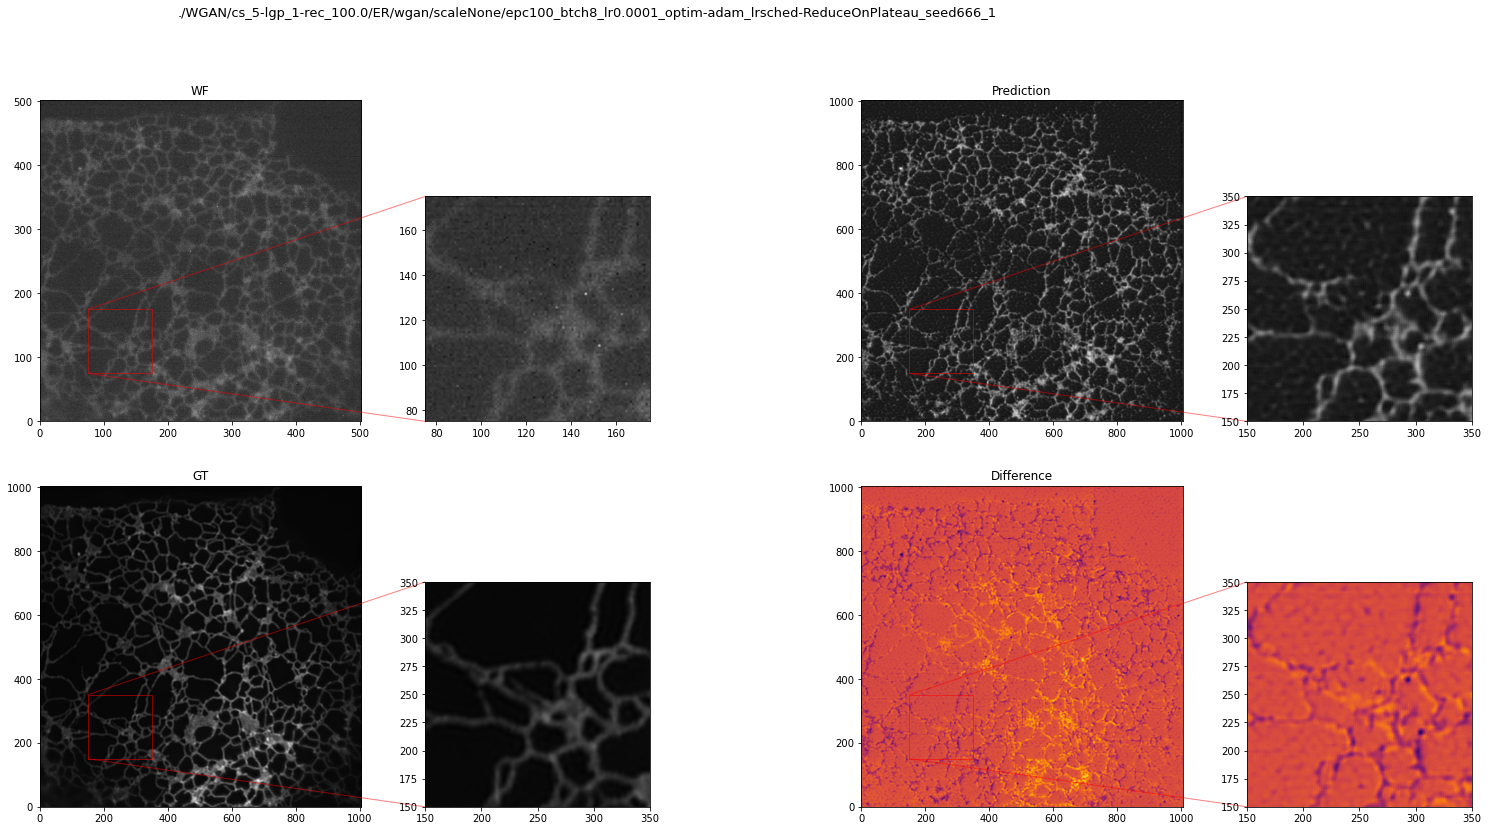

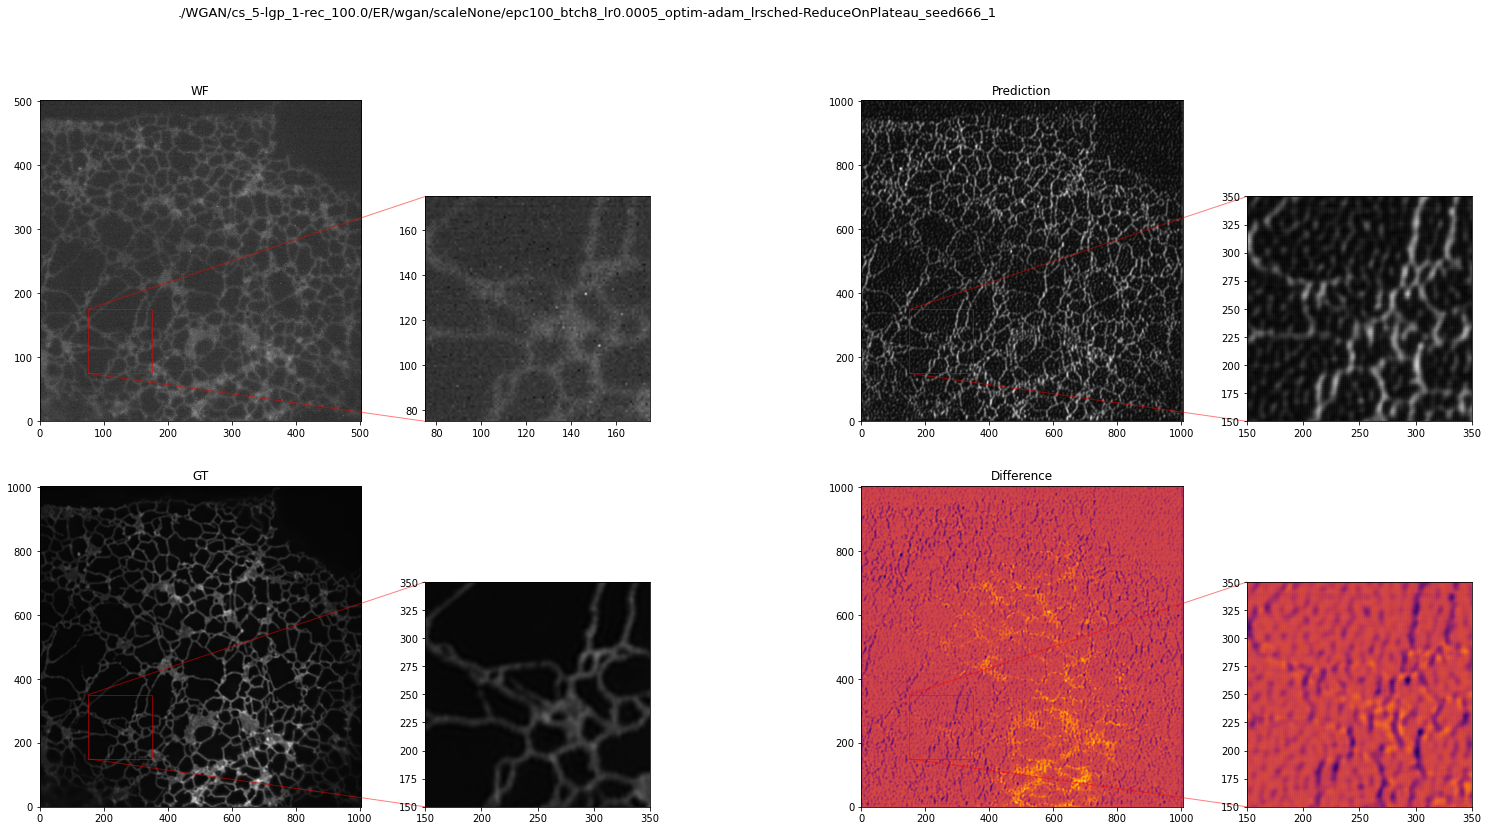

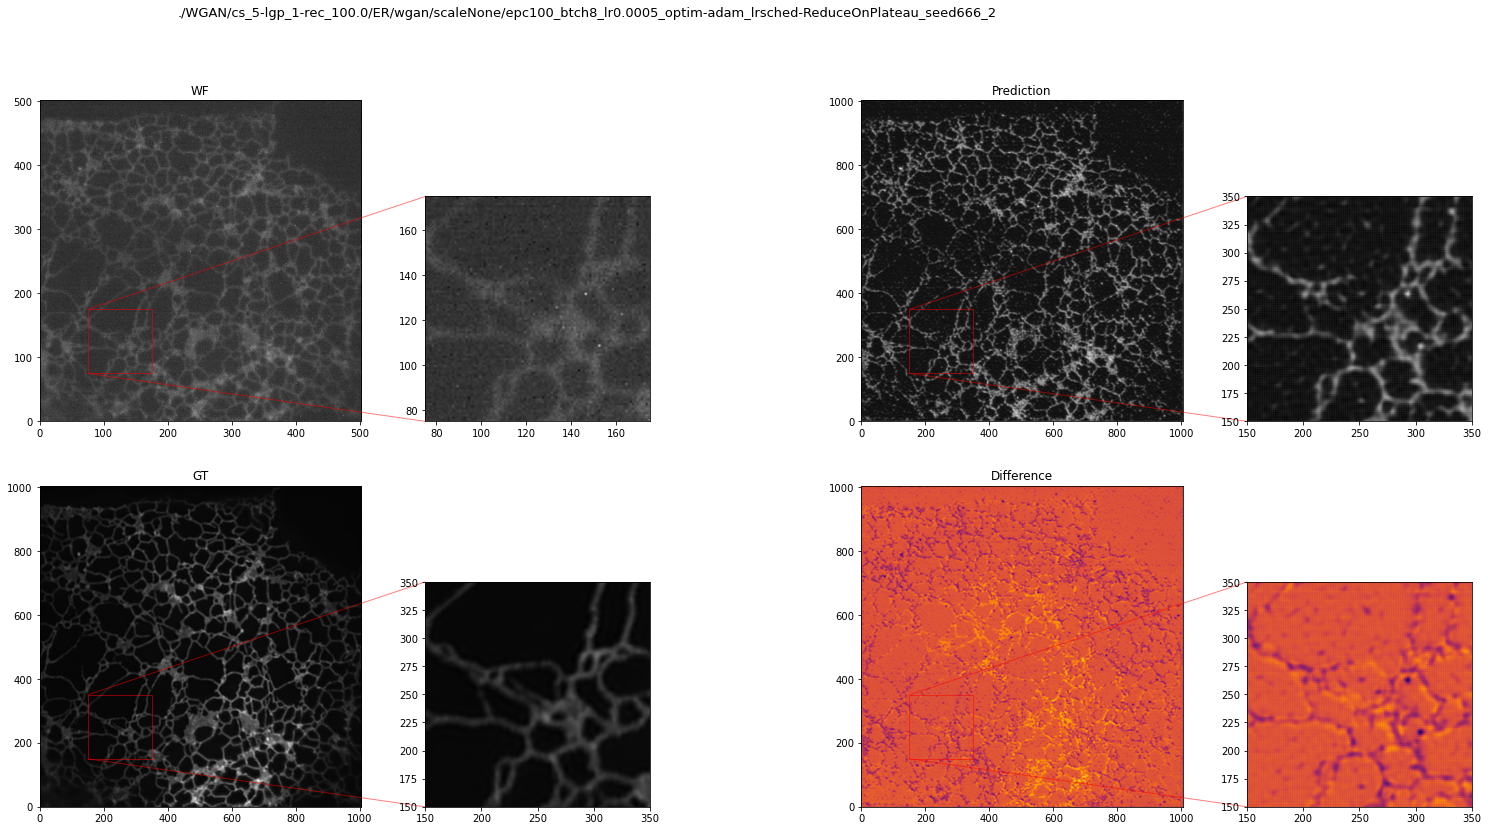

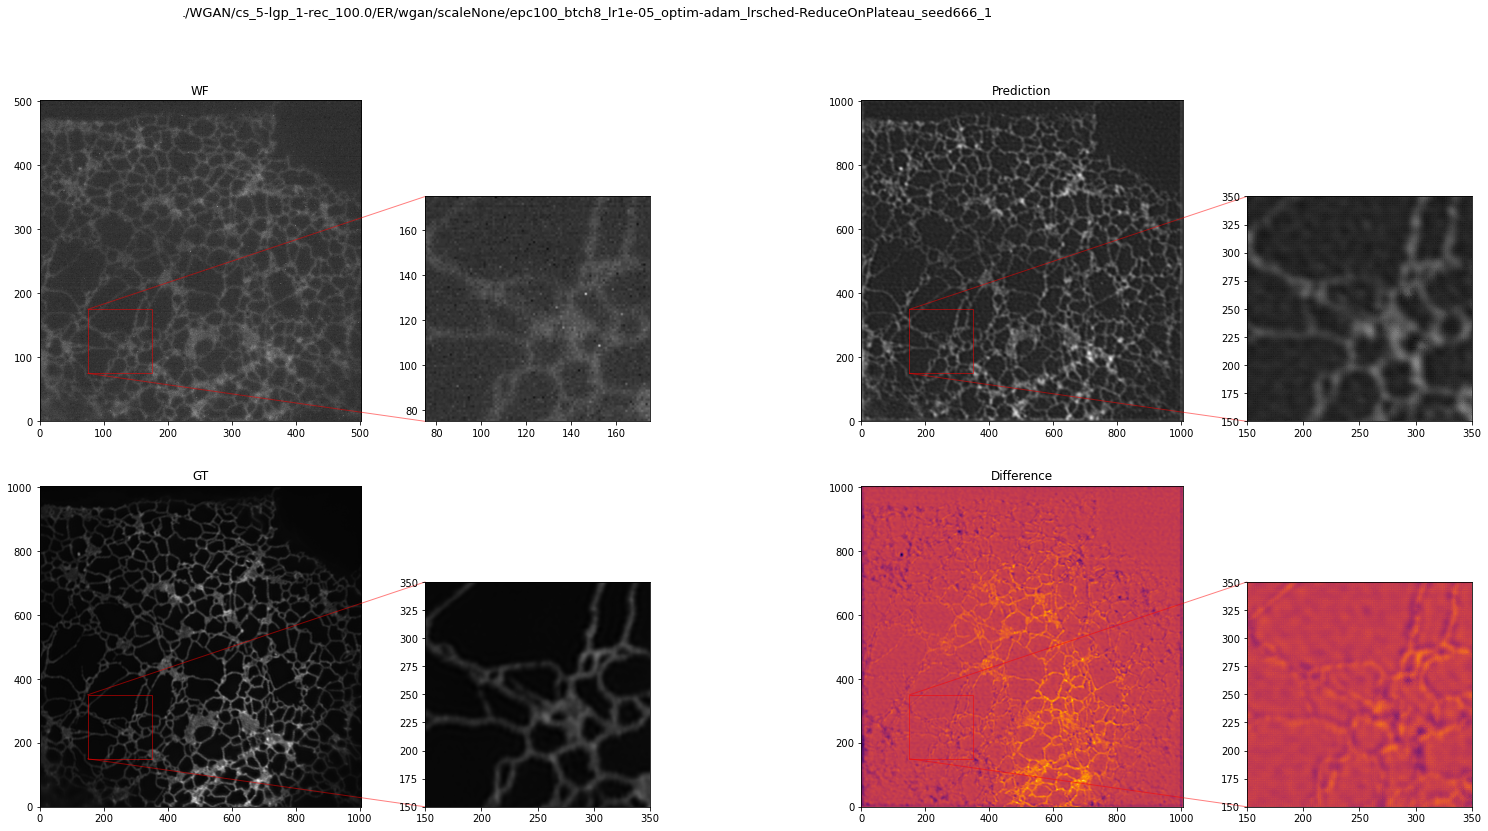

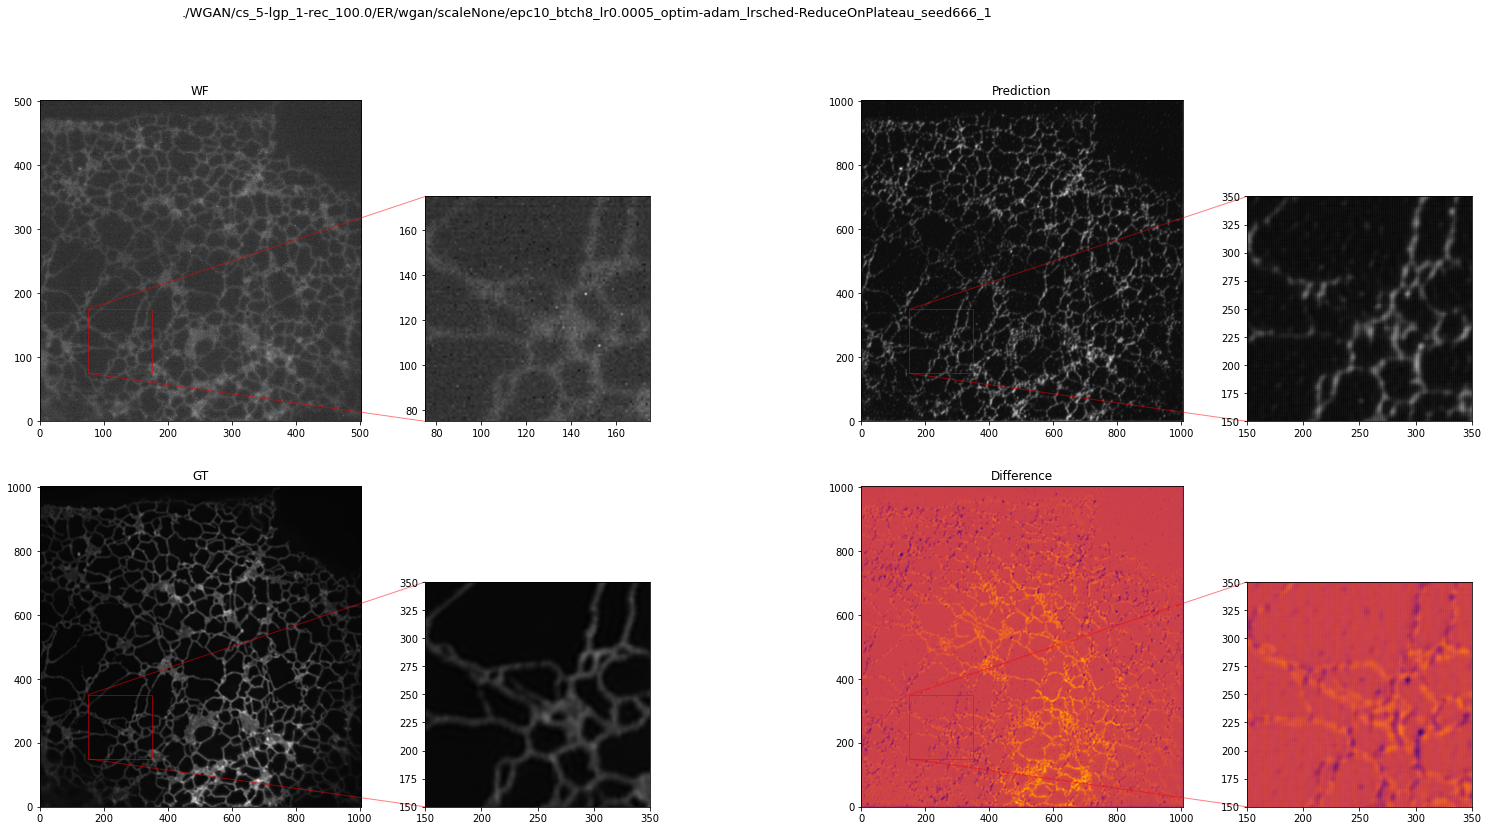

006.tif


In [4]:
crop_x, crop_y = 250, 250
crop_x_offset, crop_y_offset = 100, 100 #100, 100

config_path_list = get_config_path_list()
for config in config_path_list:
    if 'ReduceOnPlateau' in config:
        img_path = os.path.join(config, 'predicted_images')

        img_name = os.listdir(img_path)[1]
        img = read_img(os.path.join(img_path,img_name))

        gt_path = extract_gt_path(img_path)
        gt_img = read_img(os.path.join(gt_path, img_name))

        wf_path = gt_path.replace('gt', 'wf')
        if 'level' in wf_path:
            wf_path = re.sub(r'level_\d\d', 'level_01', wf_path)
        wf_img = read_img(os.path.join(wf_path, img_name))

        scale = gt_img.shape[0]//wf_img.shape[0]

        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,13))
        ax = axs[0,0]
        ax.set_title('WF')
        extent = (0, wf_img.shape[0], 0, wf_img.shape[1])
        ax.imshow(wf_img, 'gray', extent=extent, origin="lower")
        axins = ax.inset_axes([1.2, 0.0, 0.7, 0.7])
        axins.imshow(wf_img, 'gray', extent=extent, origin="lower")
        x1, x2, y1, y2 = crop_x//scale - crop_x_offset//scale, crop_x//scale + crop_x_offset//scale, crop_y//scale - crop_y_offset//scale, crop_y//scale + crop_y_offset//scale
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        ax.indicate_inset_zoom(axins, edgecolor="red")

        ax = axs[1,0]
        ax.set_title('GT')
        extent = (0, gt_img.shape[0], 0, gt_img.shape[1])
        ax.imshow(gt_img, 'gray', extent=extent, origin="lower")
        axins = ax.inset_axes([1.2, 0.0, 0.7, 0.7])
        axins.imshow(gt_img, 'gray', extent=extent, origin="lower")
        x1, x2, y1, y2 = crop_x - crop_x_offset, crop_x + crop_x_offset, crop_y - crop_y_offset, crop_y + crop_y_offset
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        ax.indicate_inset_zoom(axins, edgecolor="red")

        ax = axs[0,1]
        ax.set_title('Prediction')
        extent = (0, img.shape[0], 0, img.shape[1])
        ax.imshow(img, 'gray', extent=extent, origin="lower")
        axins = ax.inset_axes([1.2, 0.0, 0.7, 0.7])
        axins.imshow(img, 'gray', extent=extent, origin="lower")
        x1, x2, y1, y2 = crop_x - crop_x_offset, crop_x + crop_x_offset, crop_y - crop_y_offset, crop_y + crop_y_offset
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        ax.indicate_inset_zoom(axins, edgecolor="red")

        difference = gt_img - img

        ax = axs[1,1]
        ax.set_title('Difference')
        extent = (0, difference.shape[0], 0, difference.shape[1])
        ax.imshow(difference, 'inferno', extent=extent, origin="lower")
        axins = ax.inset_axes([1.2, 0.0, 0.7, 0.7])
        axins.imshow(difference, 'inferno', extent=extent, origin="lower")
        x1, x2, y1, y2 = crop_x - crop_x_offset, crop_x + crop_x_offset, crop_y - crop_y_offset, crop_y + crop_y_offset
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        ax.indicate_inset_zoom(axins, edgecolor="red")

        fig.suptitle(config, fontsize=13)
        plt.show()

print(img_name)

# Analyze one dataset

In [18]:
config_path_list = get_config_path_list()
for e in config_path_list:
    print(e)

# config = "./GANS_test_2/critic_steps_5/ER/wgan/scaleNone/epc200_btch8_lr0.0005_optim-rms_prop_lrsched-Fixed_seed666_1"
config = "./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc50_btch8_lr5e-05_optim-adam_lrsched-MultiStepScheduler_seed666_1"

print(f'\nSelected: {config}')

./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0001_optim-adam_lrsched-ReduceOnPlateau_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-CosineDecay_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-Fixed_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-MultiStepScheduler_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-MultiStepScheduler_seed666_2
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-OneCycle_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-ReduceOnPlateau_seed666_1
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr0.0005_optim-adam_lrsched-ReduceOnPlateau_seed666_2
./WGAN/cs_5-lgp_1-rec_100.0/ER/wgan/scaleNone/epc100_btch8_lr1e-05_optim-adam_lrsched-ReduceOnPlateau_seed666_1

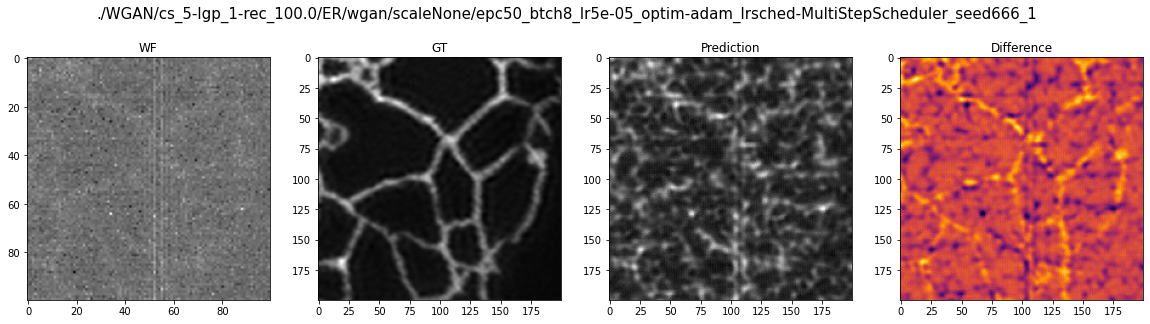

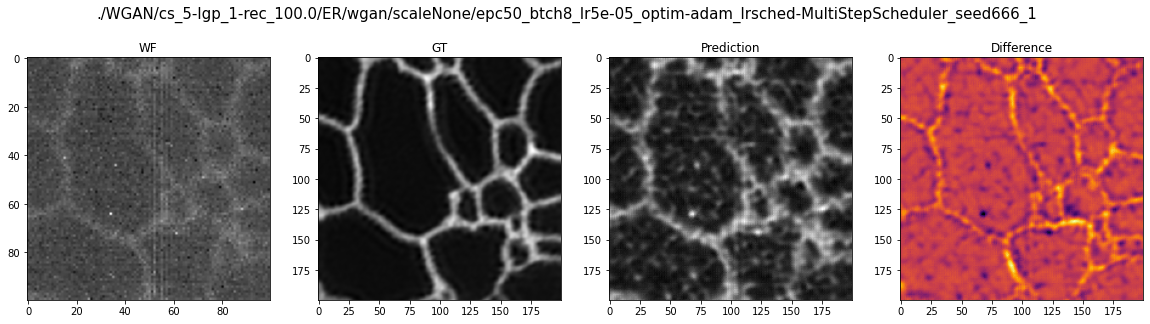

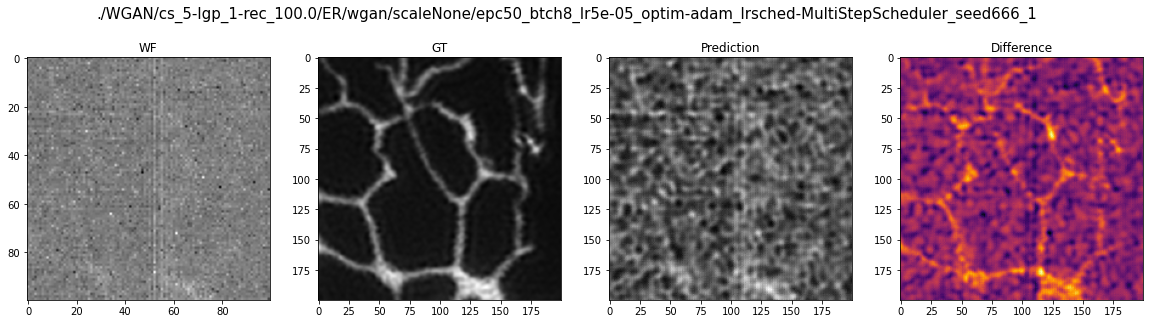

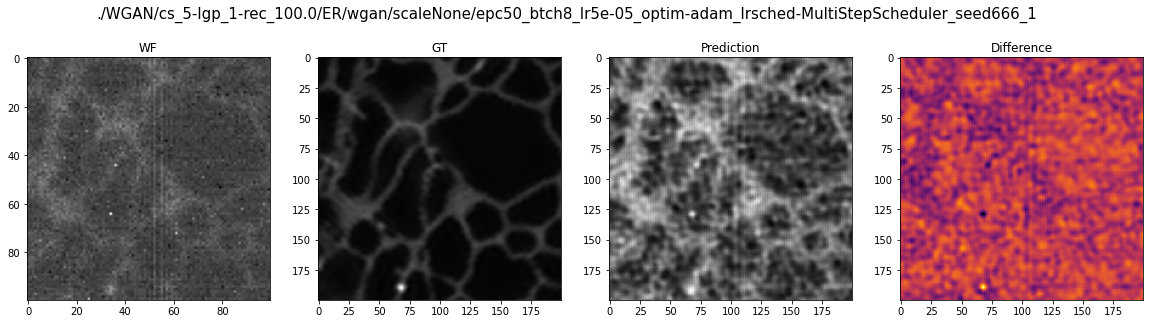

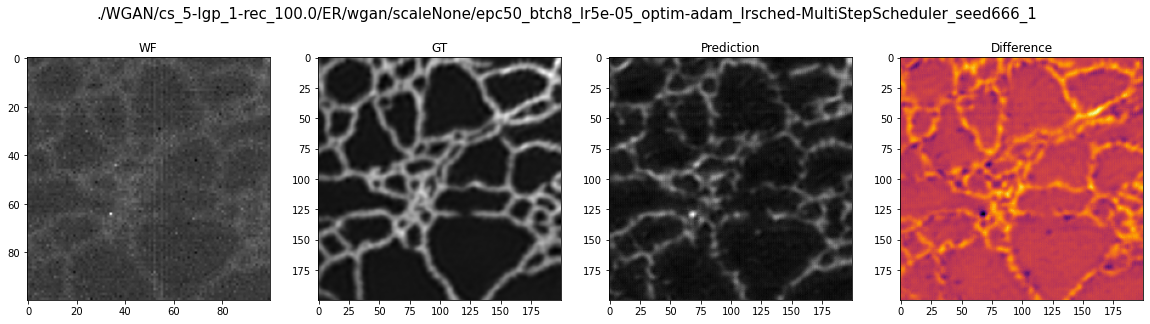

In [19]:
import re

crop_x, crop_y = 500, 500
crop_x_offset, crop_y_offset = 100,100 #100, 100

img_path = os.path.join(config, 'predicted_images')

for img_name in sorted(os.listdir(img_path))[:5]:
        img = read_img(os.path.join(img_path,img_name))

        gt_path = extract_gt_path(img_path)
        gt_img = read_img(os.path.join(gt_path, img_name))

        wf_path = gt_path.replace('gt', 'wf')
        wf_path = re.sub(r'level_\d+', 'level_01', wf_path)
        wf_img = read_img(os.path.join(wf_path, img_name))

        scale = gt_img.shape[0]//wf_img.shape[0]

        plt.figure(figsize=(20,5))
        plt.subplot(1,4,1)
        plt.imshow(wf_img[crop_x//scale - crop_x_offset//scale:crop_x//scale + crop_x_offset//scale, 
                        crop_y//scale - crop_y_offset//scale:crop_y//scale + crop_y_offset//scale], 'gray')
        plt.title('WF')
        plt.subplot(1,4,2)
        plt.imshow(gt_img[crop_x - crop_x_offset:crop_x + crop_x_offset, 
                        crop_y - crop_y_offset:crop_y + crop_y_offset], 'gray')
        plt.title('GT')
        plt.subplot(1,4,3)
        plt.imshow(img[crop_x - crop_x_offset:crop_x + crop_x_offset, 
                        crop_y - crop_y_offset:crop_y + crop_y_offset], 'gray')
        plt.title('Prediction')
        plt.subplot(1,4,4)
        plt.imshow(gt_img[crop_x - crop_x_offset:crop_x + crop_x_offset, 
                        crop_y - crop_y_offset:crop_y + crop_y_offset] - 
                img[crop_x - crop_x_offset:crop_x + crop_x_offset, 
                        crop_y - crop_y_offset:crop_y + crop_y_offset], 'inferno')
        plt.title('Difference')
        plt.suptitle(config, fontsize=15)
        plt.show()

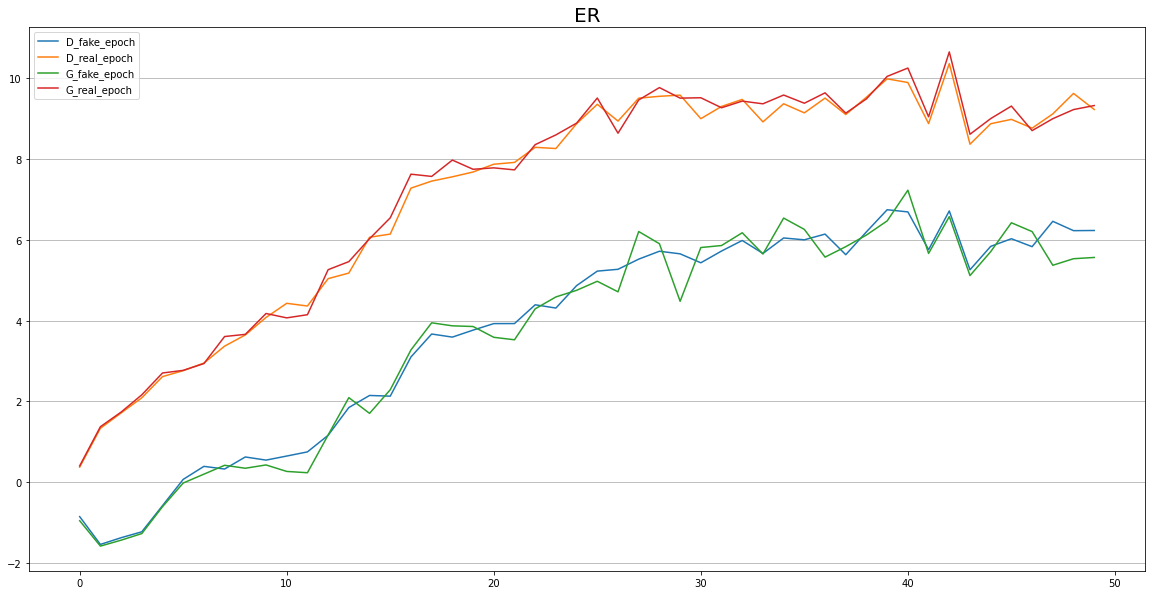

In [20]:
plt.figure(figsize=(20,10))
plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_fake_epoch.npy')), label='D_fake_epoch')
plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_real_epoch.npy')), label='D_real_epoch')
plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_fake_epoch.npy')), label='G_fake_epoch')
plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_real_epoch.npy')), label='G_real_epoch')
plt.grid(axis='y')
plt.title(extract_dataset(config), fontsize=20)
plt.legend()
plt.show()

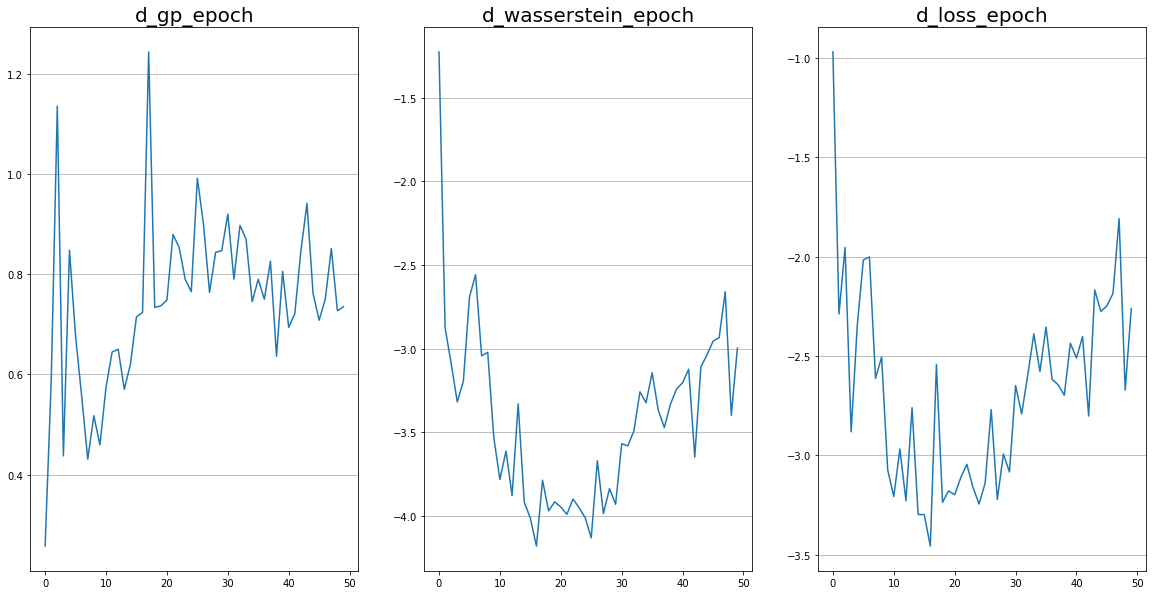

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_gp_epoch.npy')), label='d_gp_epoch')
plt.title('d_gp_epoch', fontsize=20)
plt.grid(axis='y')
plt.subplot(1,3,2)
plt.plot(- np.load(os.path.join(config, 'train_metrics', 'd_wasserstein_epoch.npy')), label='d_wasserstein_epoch')
plt.title('d_wasserstein_epoch', fontsize=20)
plt.grid(axis='y')
plt.subplot(1,3,3)
plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_loss_epoch.npy')), label='d_loss_epoch')
plt.grid(axis='y')
plt.title('d_loss_epoch', fontsize=20)
plt.show()

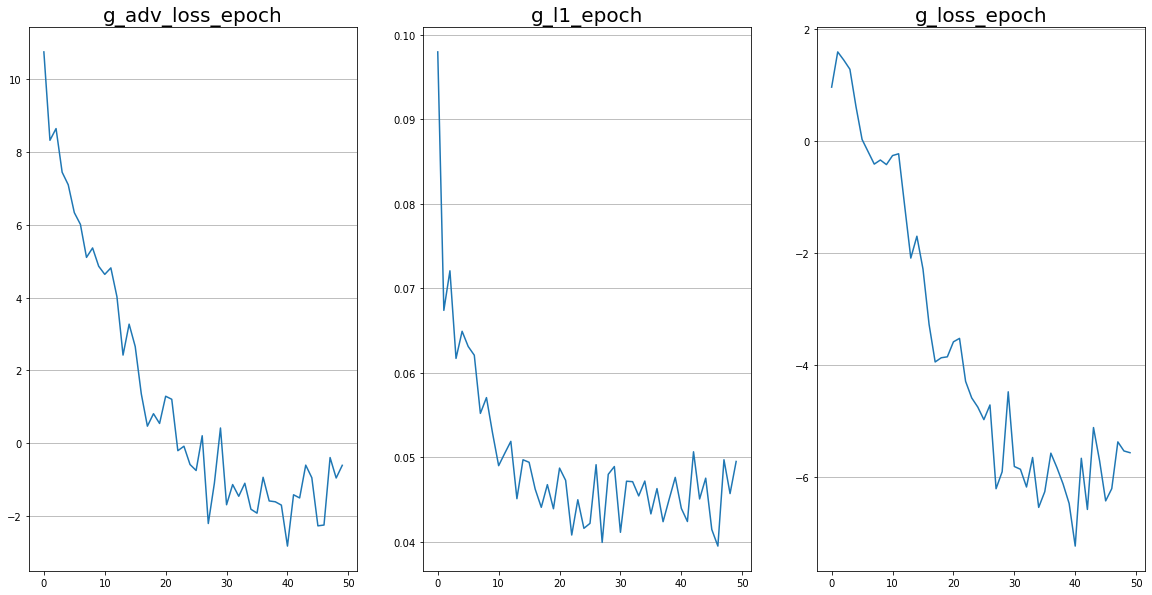

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_adv_loss_epoch.npy')), label='d_adv_loss_epoch')
# plt.plot(- np.load(os.path.join(config, 'train_metrics', 'd_fake_epoch.npy')), label='d_fake_epoch')
# plt.plot(- np.load(os.path.join(config, 'train_metrics', 'd_real_epoch.npy')), label='d_real_epoch')
# plt.legend()
plt.title('g_adv_loss_epoch', fontsize=20)
plt.grid(axis='y')
plt.subplot(1,3,2)
plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_l1_epoch.npy')), label='d_wasserstein_epoch')
plt.title('g_l1_epoch', fontsize=20)
plt.grid(axis='y')
plt.subplot(1,3,3)
plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_loss_epoch.npy')), label='d_loss_epoch')
plt.grid(axis='y')
plt.title('g_loss_epoch', fontsize=20)
plt.show()

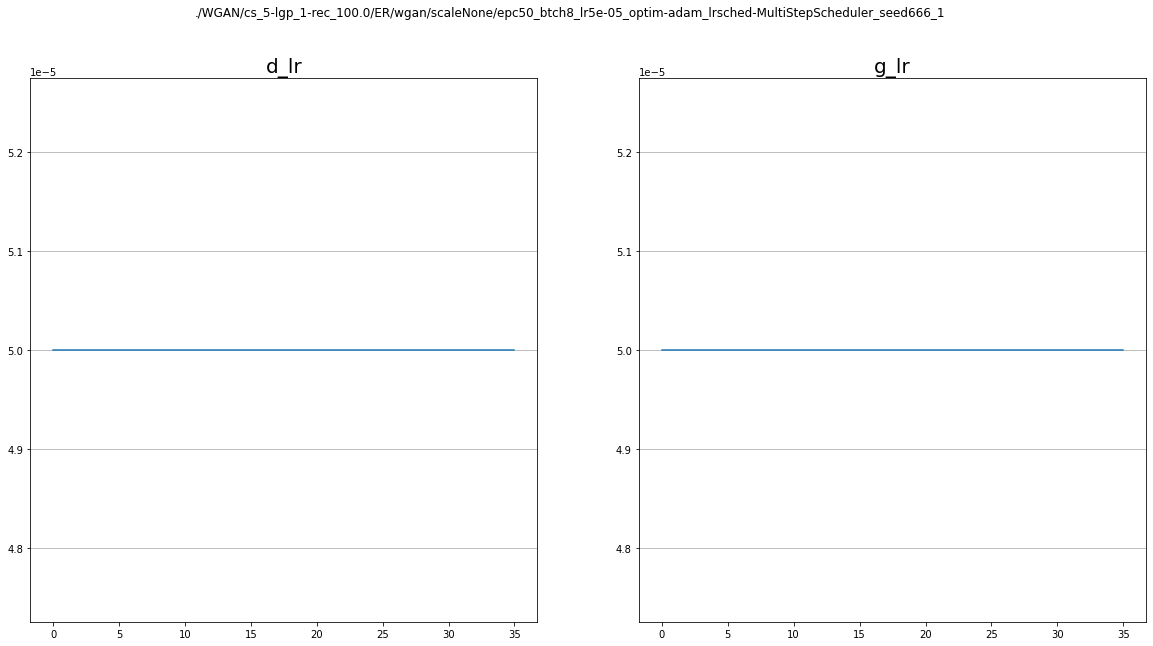

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
if 'd_lr.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_lr.npy')), label='d_lr')
elif 'lr-SGD.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-SGD.npy')), label='d_lr')
elif 'lr-RMSprop.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-RMSprop.npy')), label='d_lr')
elif 'lr-Adam.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-Adam.npy')), label='d_lr')
plt.title('d_lr', fontsize=20)
plt.grid(axis='y')
plt.subplot(1,2,2)
if 'g_lr.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_lr.npy')), label='g_lr')
elif 'lr-SGD-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-SGD-1.npy')), label='d_lr')
elif 'lr-RMSprop-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-RMSprop-1.npy')), label='d_lr')
elif 'lr-Adam-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
    plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-Adam-1.npy')), label='d_lr')
plt.title('g_lr', fontsize=20)
plt.grid(axis='y')
plt.suptitle(config)
plt.show()

# Analyze the schedulres/learning rate

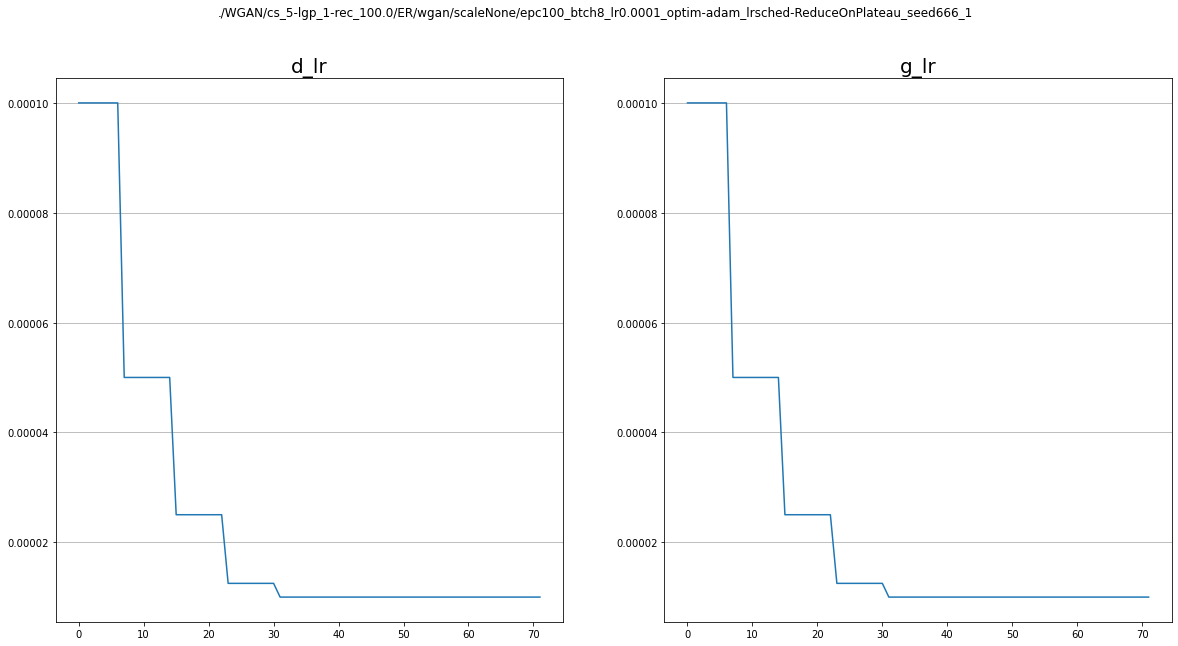

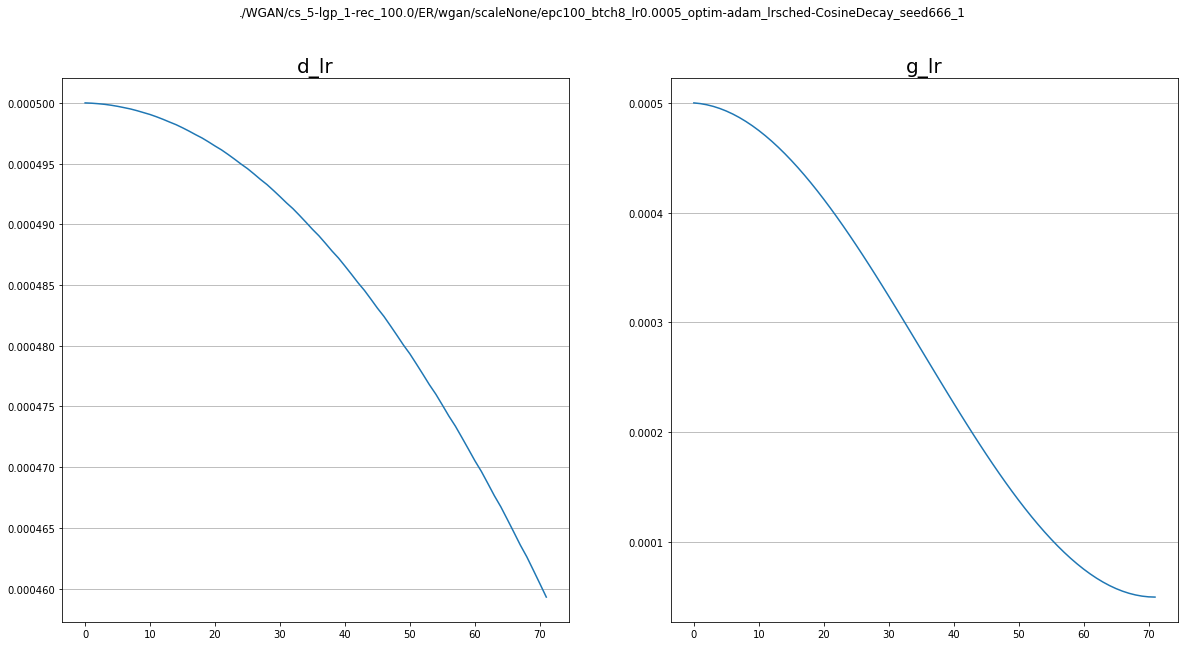

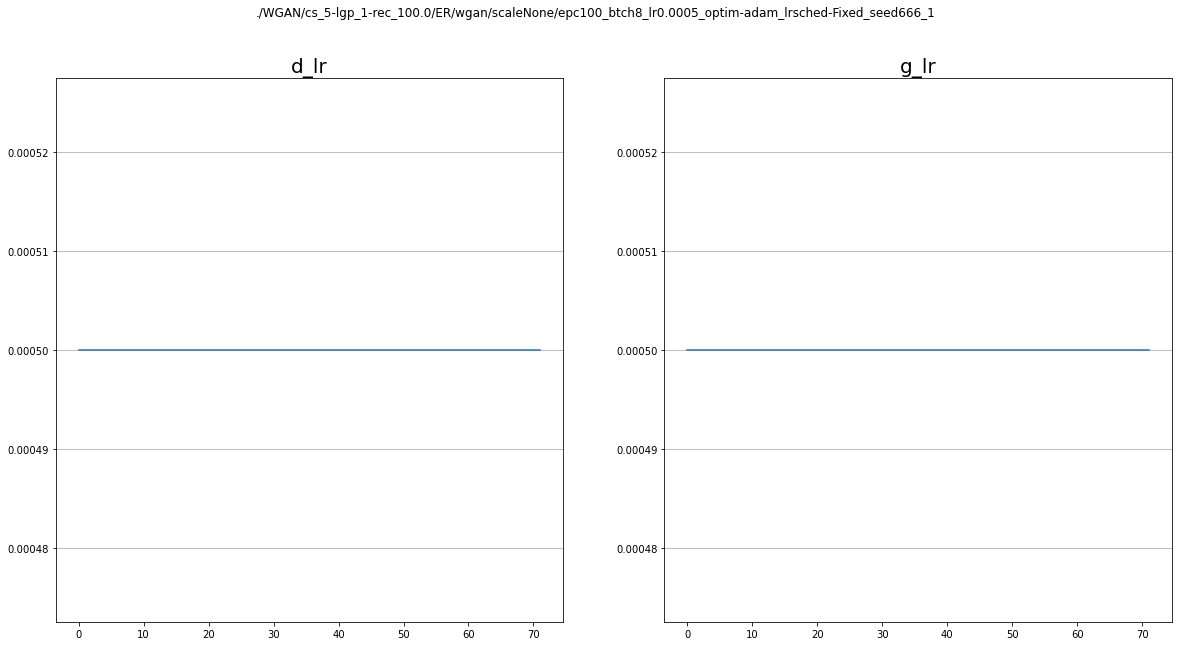

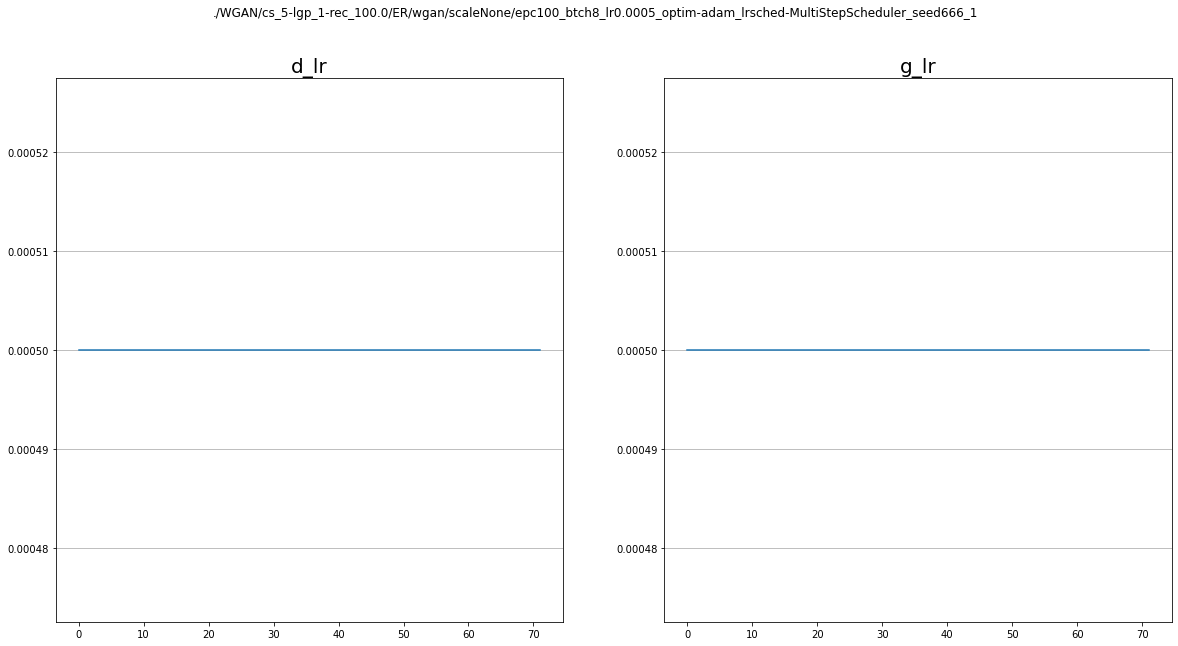

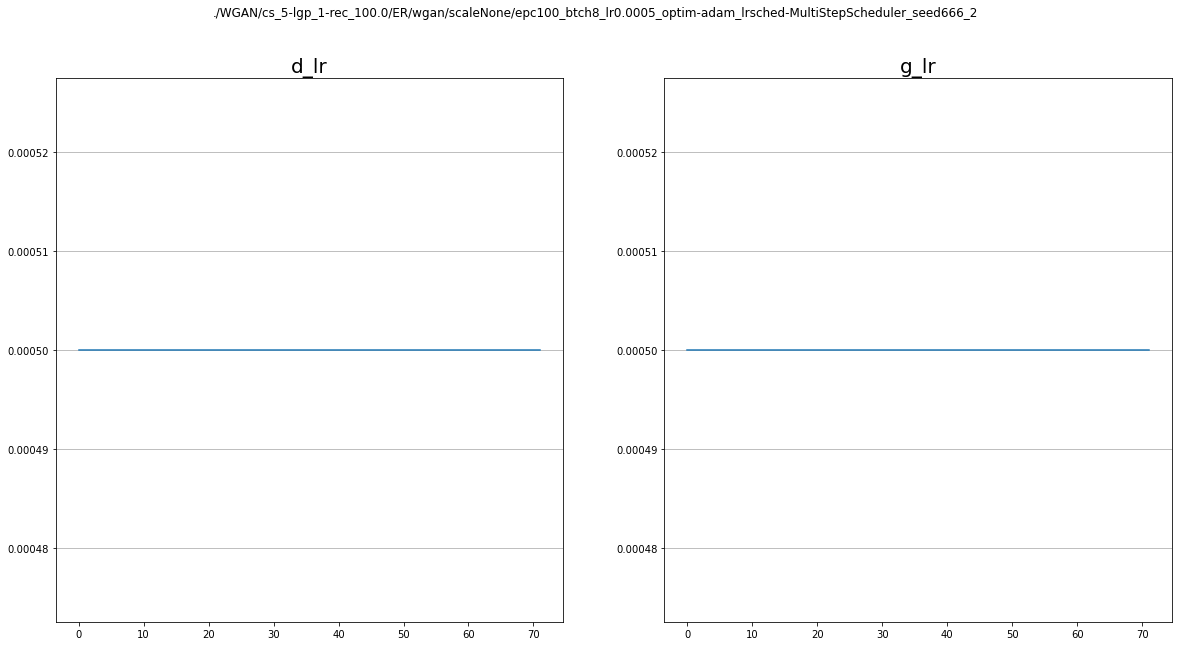

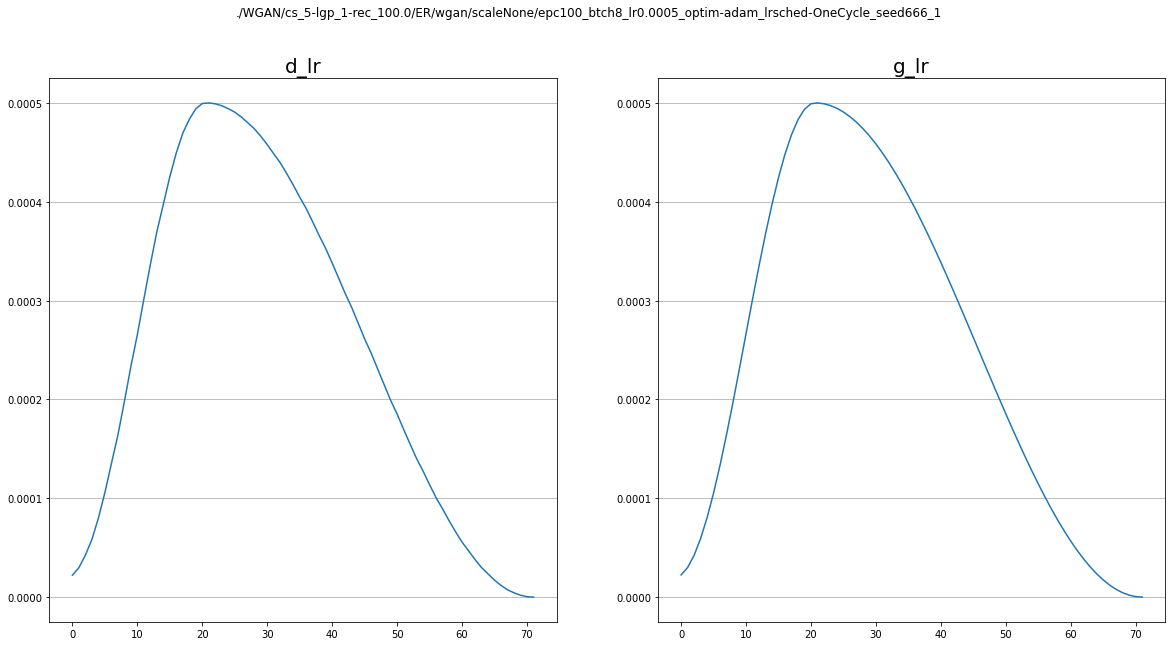

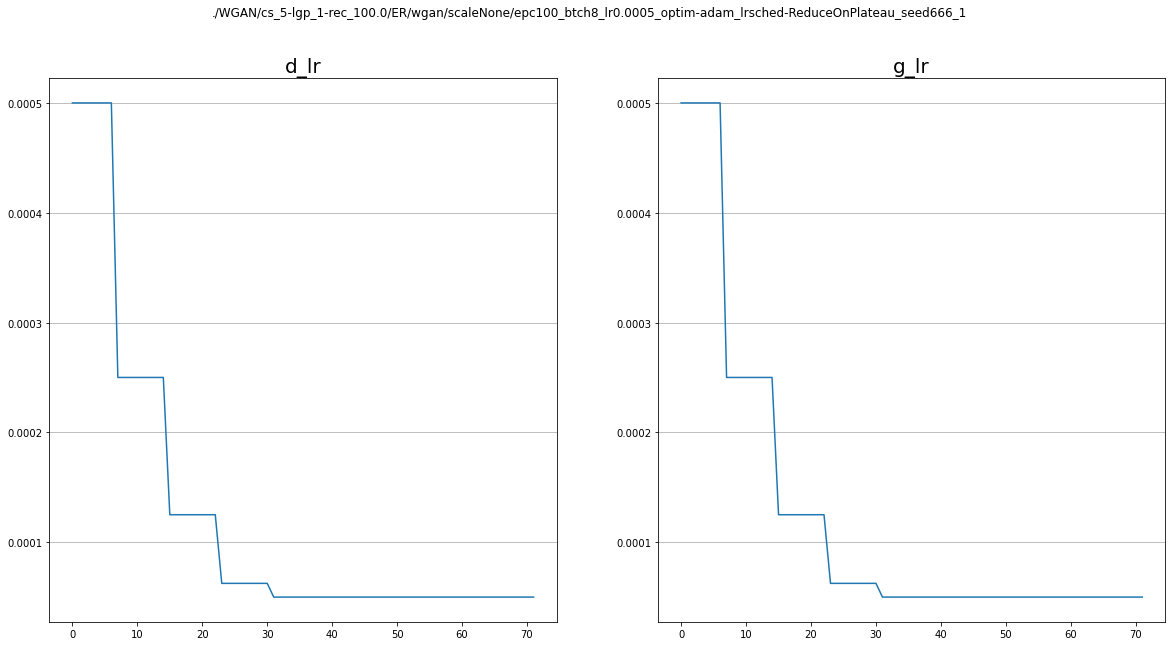

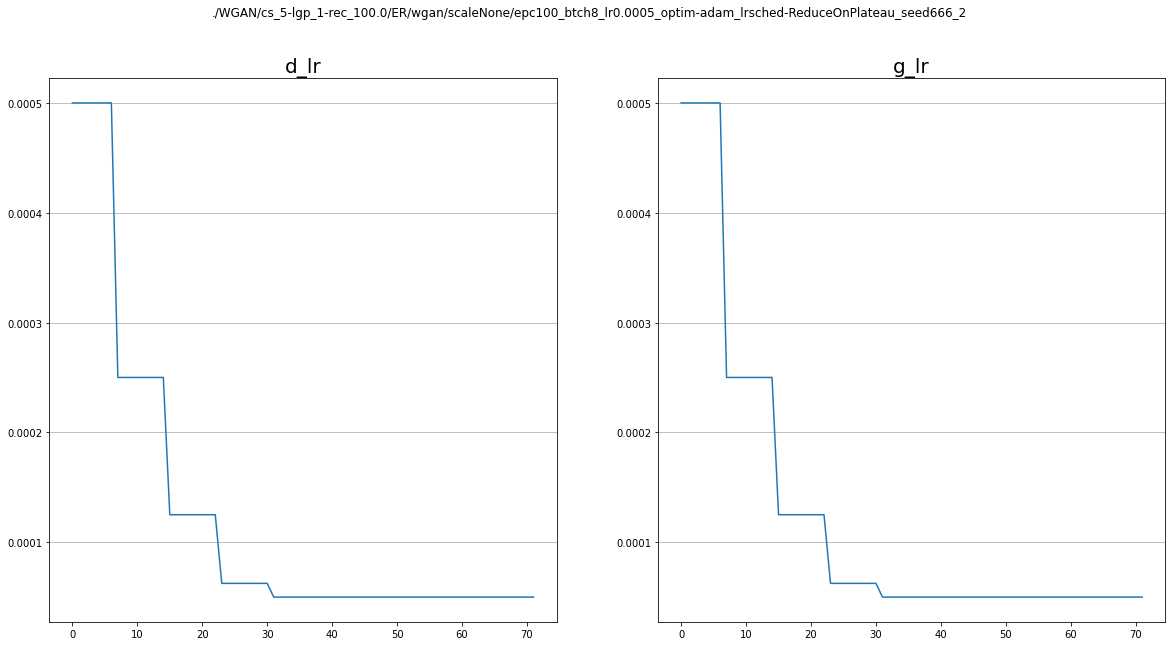

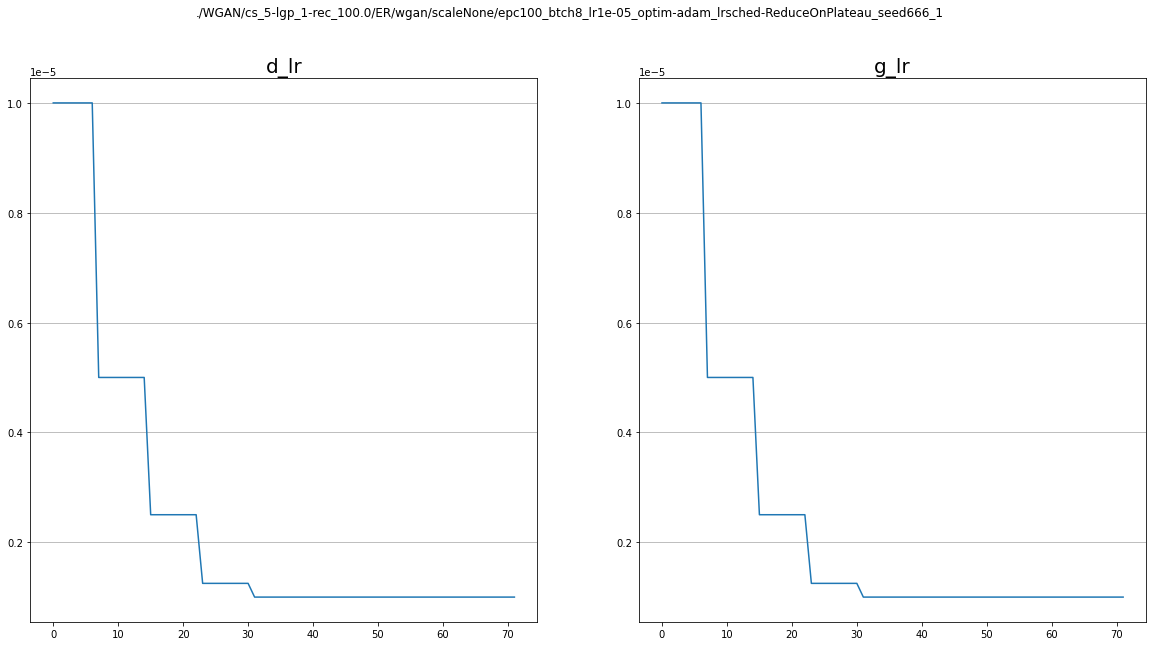

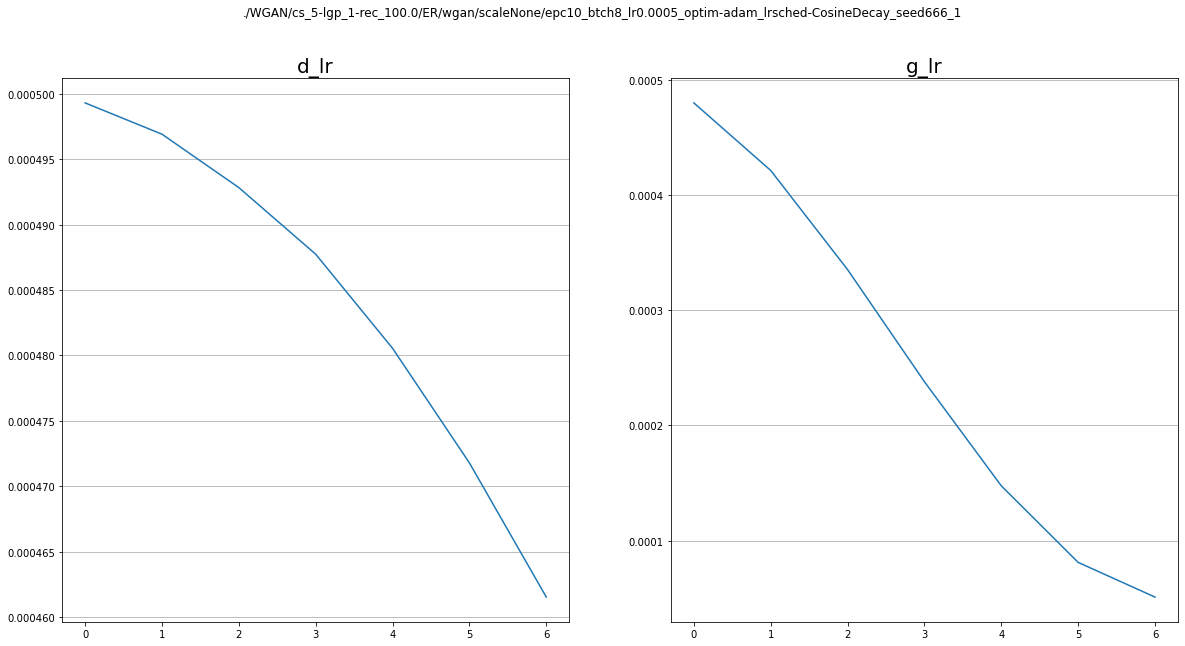

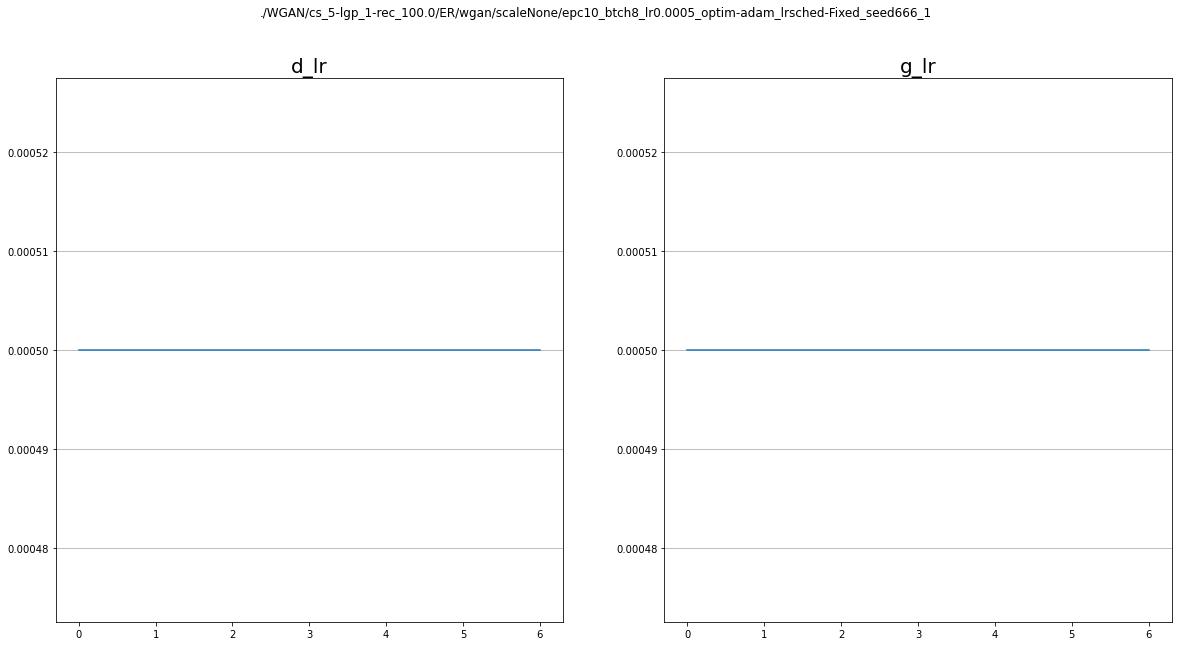

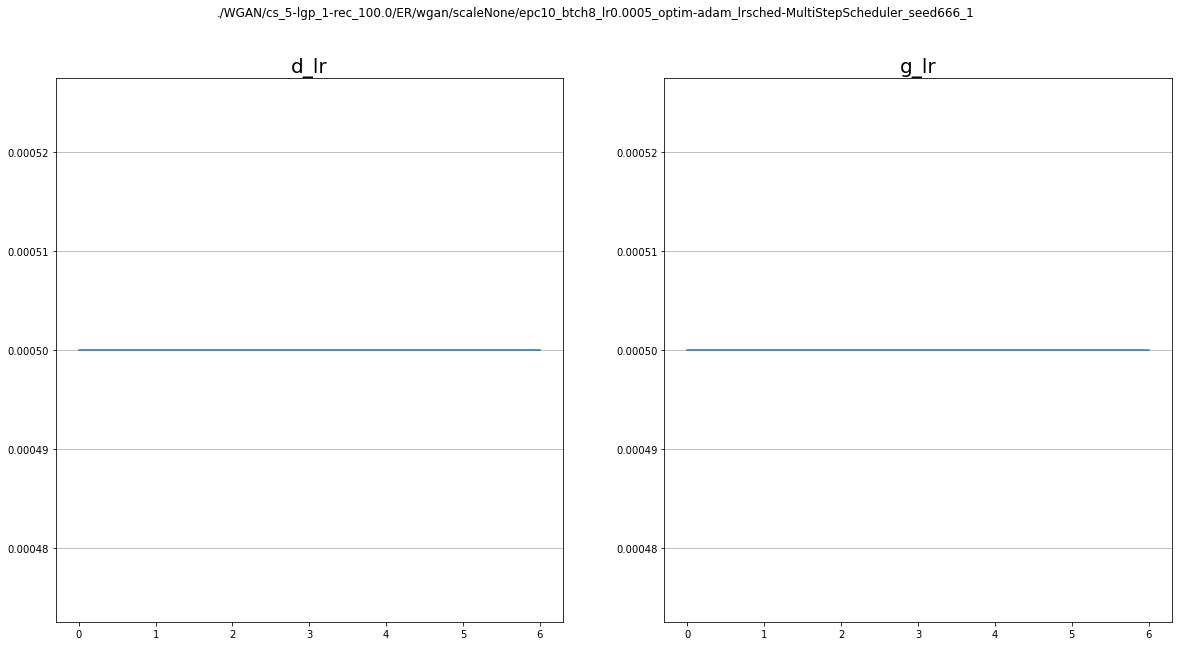

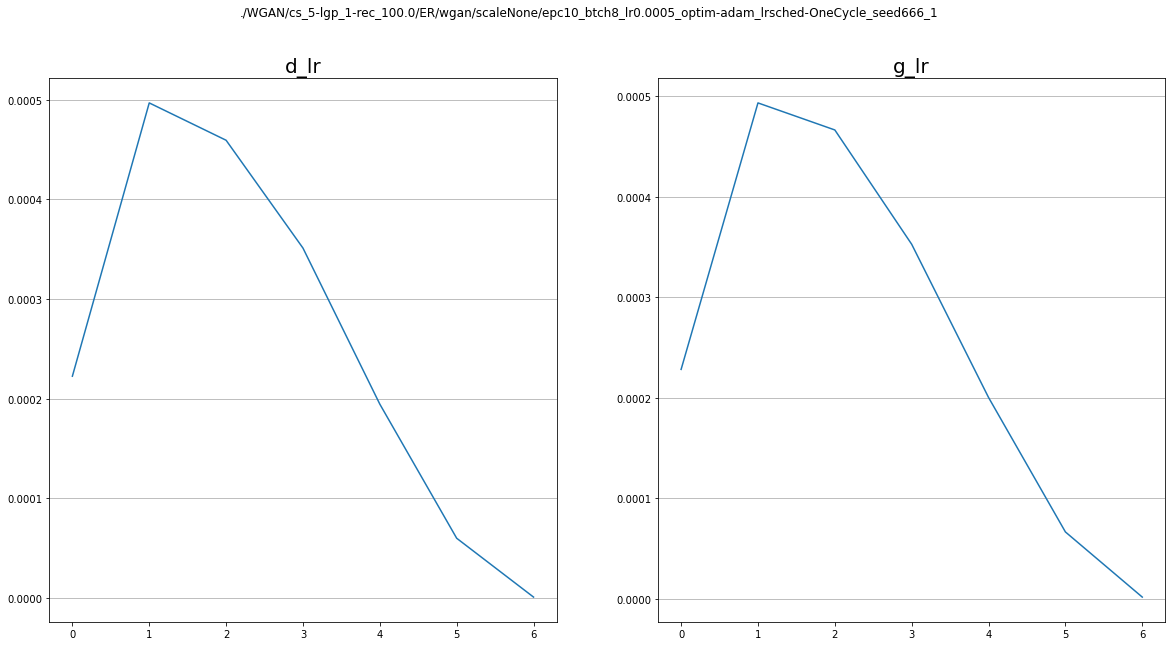

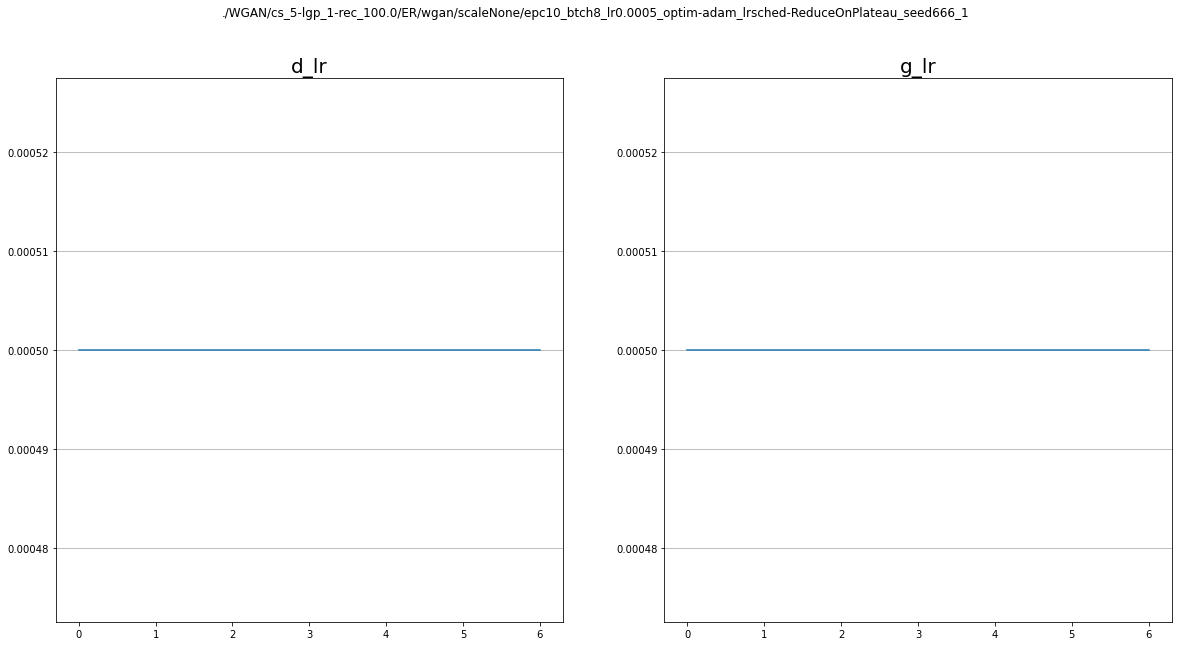

In [11]:

config_path_list = get_config_path_list()
for config in config_path_list:

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    if 'd_lr.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'd_lr.npy')), label='d_lr')
    elif 'lr-SGD.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-SGD.npy')), label='d_lr')
    elif 'lr-RMSprop.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-RMSprop.npy')), label='d_lr')
    elif 'lr-Adam.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-Adam.npy')), label='d_lr')
    plt.title('d_lr', fontsize=20)
    plt.grid(axis='y')
    plt.subplot(1,2,2)
    if 'g_lr.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'g_lr.npy')), label='g_lr')
    elif 'lr-SGD-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-SGD-1.npy')), label='d_lr')
    elif 'lr-RMSprop-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-RMSprop-1.npy')), label='d_lr')
    elif 'lr-Adam-1.npy' in os.listdir(os.path.join(config, 'train_metrics')):
        plt.plot(np.load(os.path.join(config, 'train_metrics', 'lr-Adam-1.npy')), label='d_lr')
    plt.title('g_lr', fontsize=20)
    plt.grid(axis='y')
    plt.suptitle(config)
    plt.show()

# All datasets

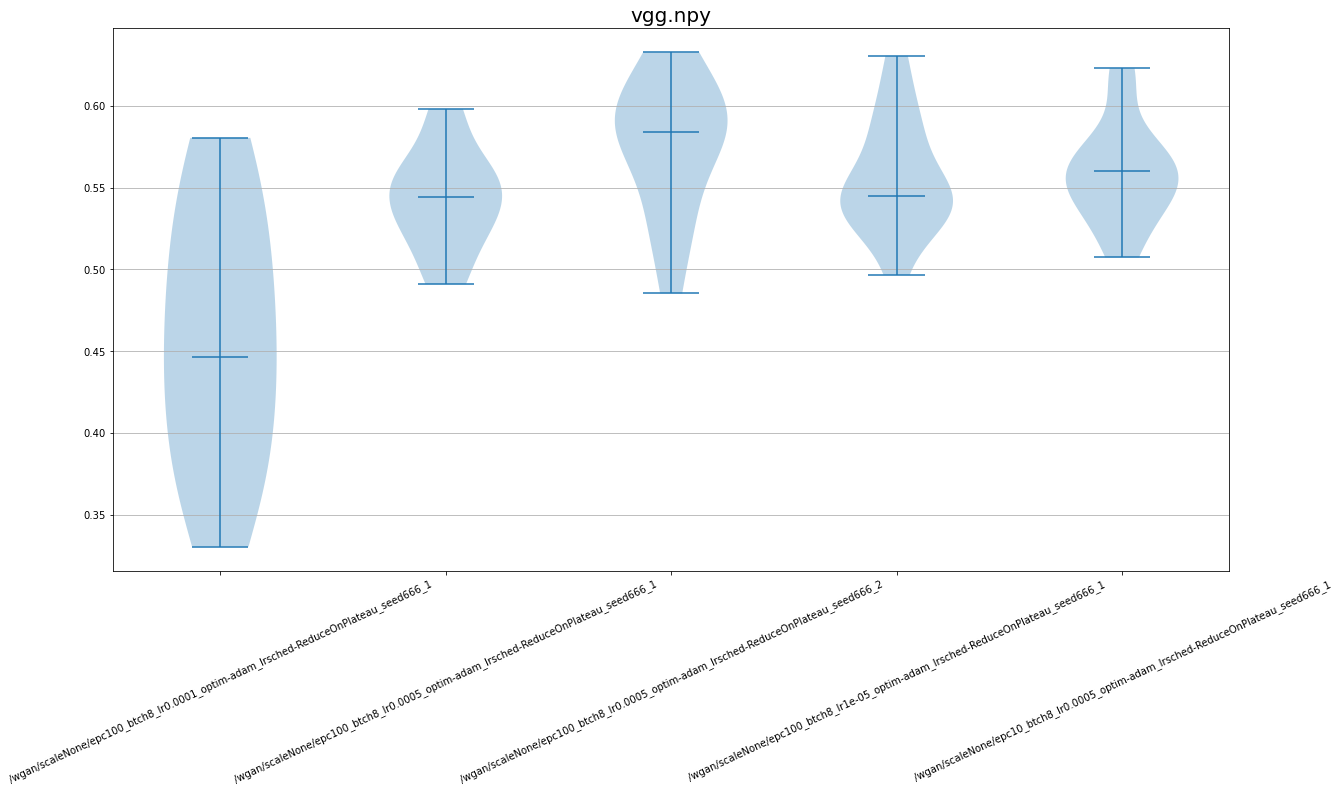

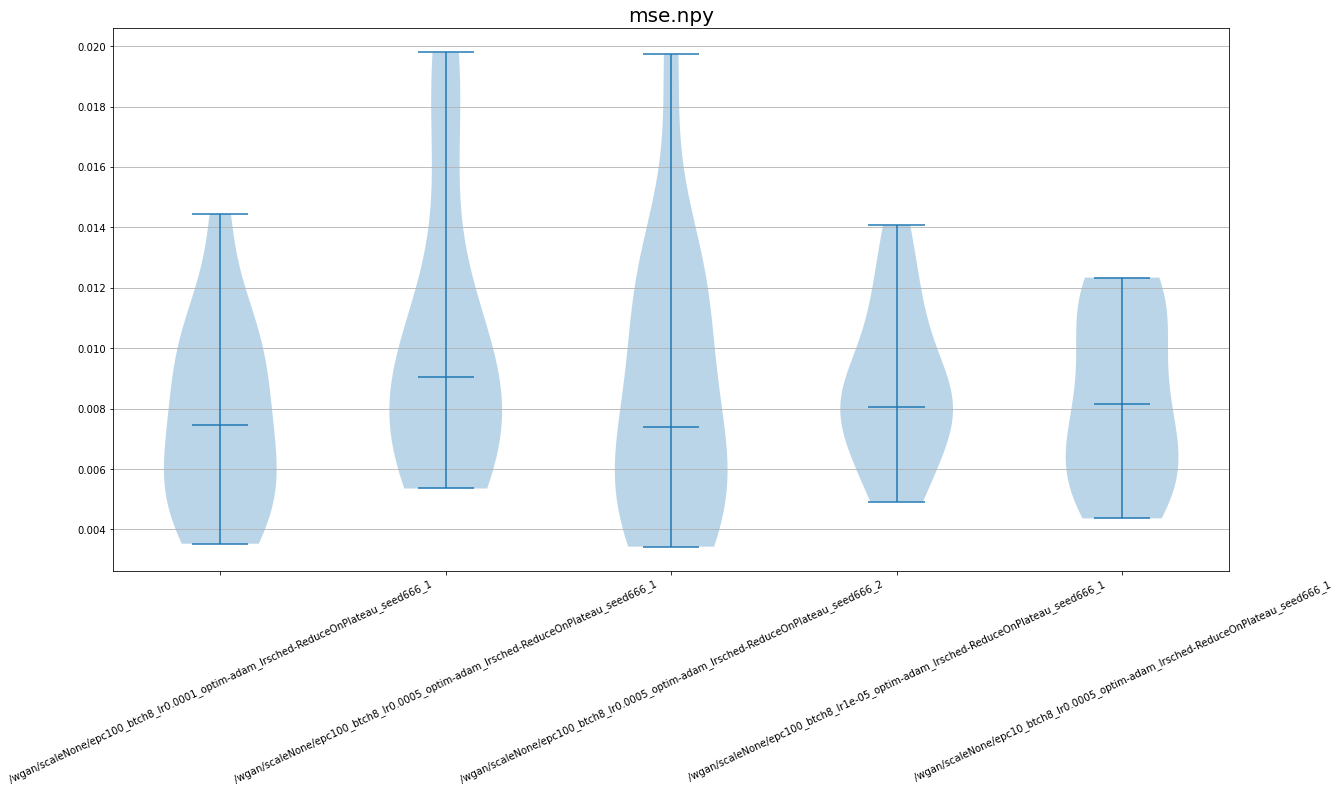

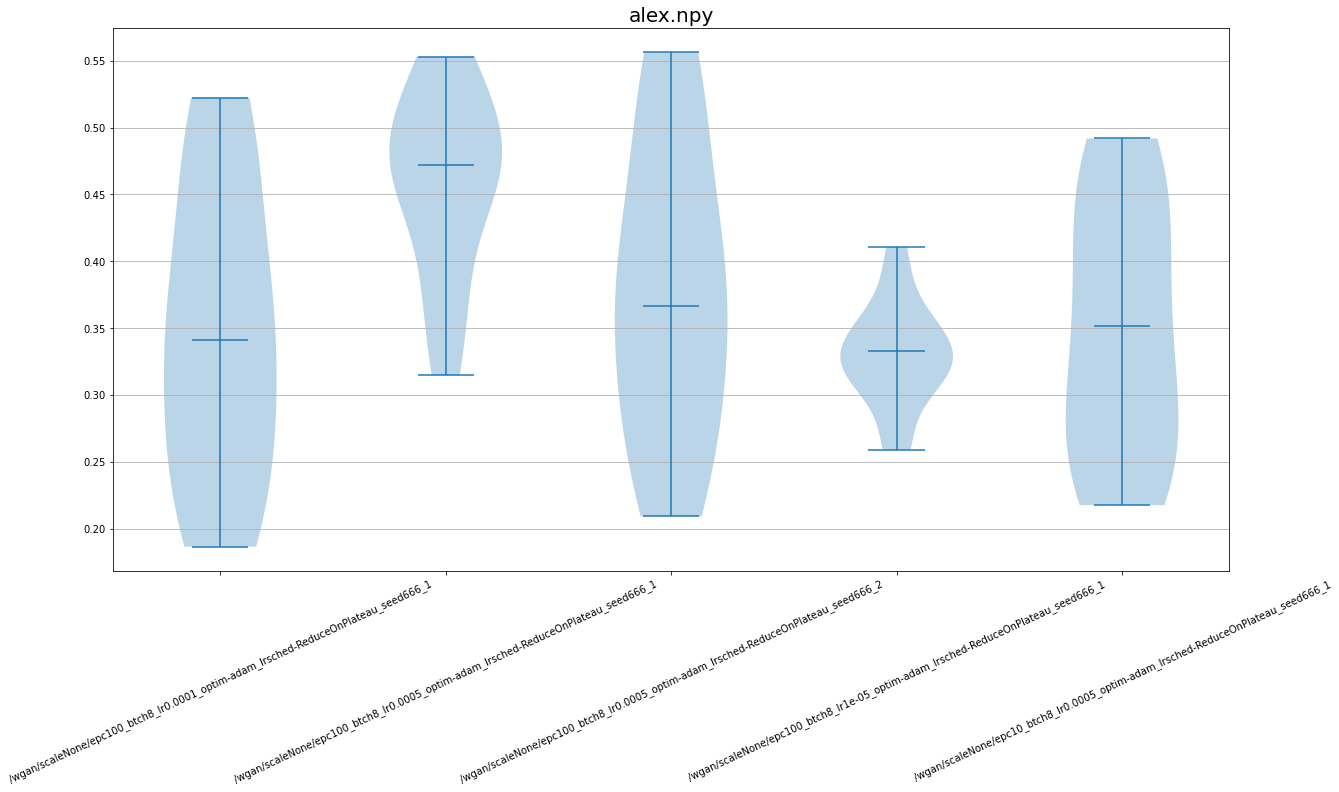

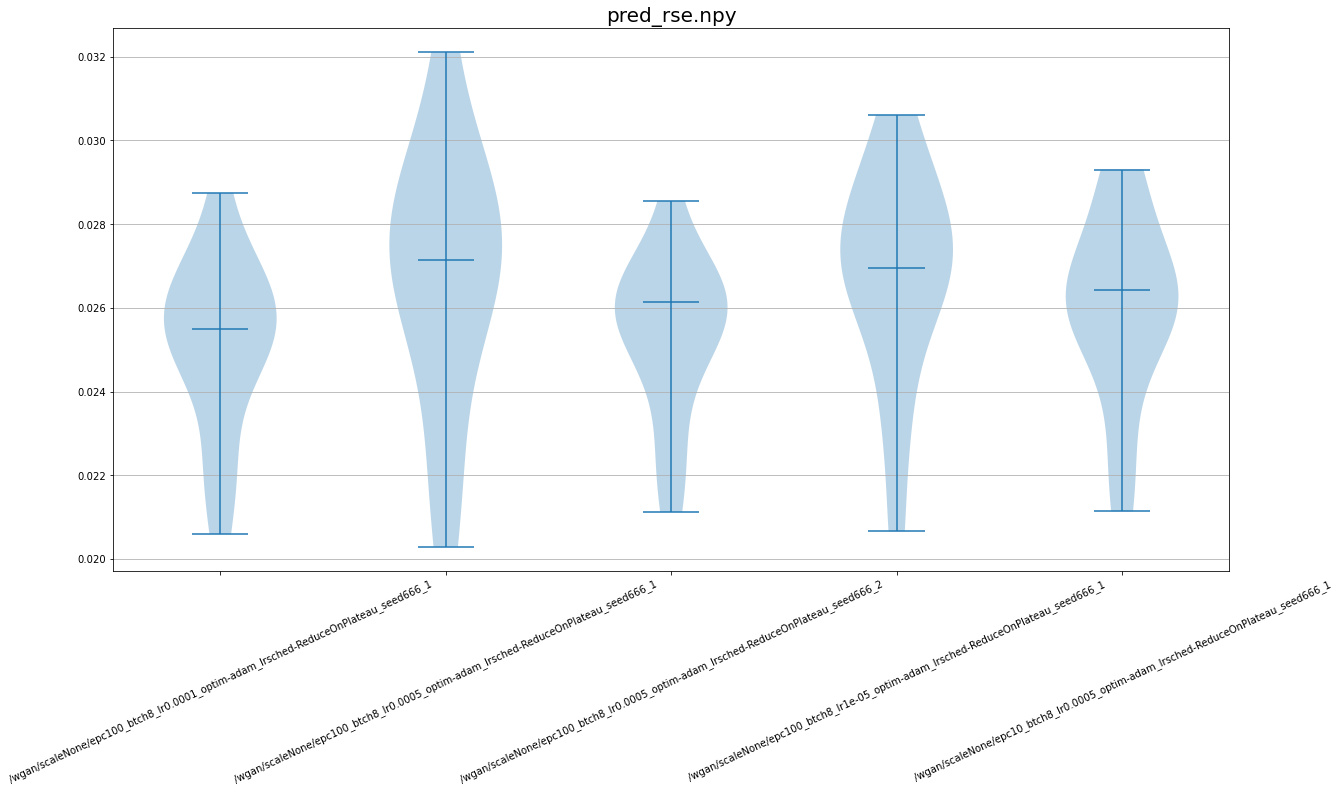

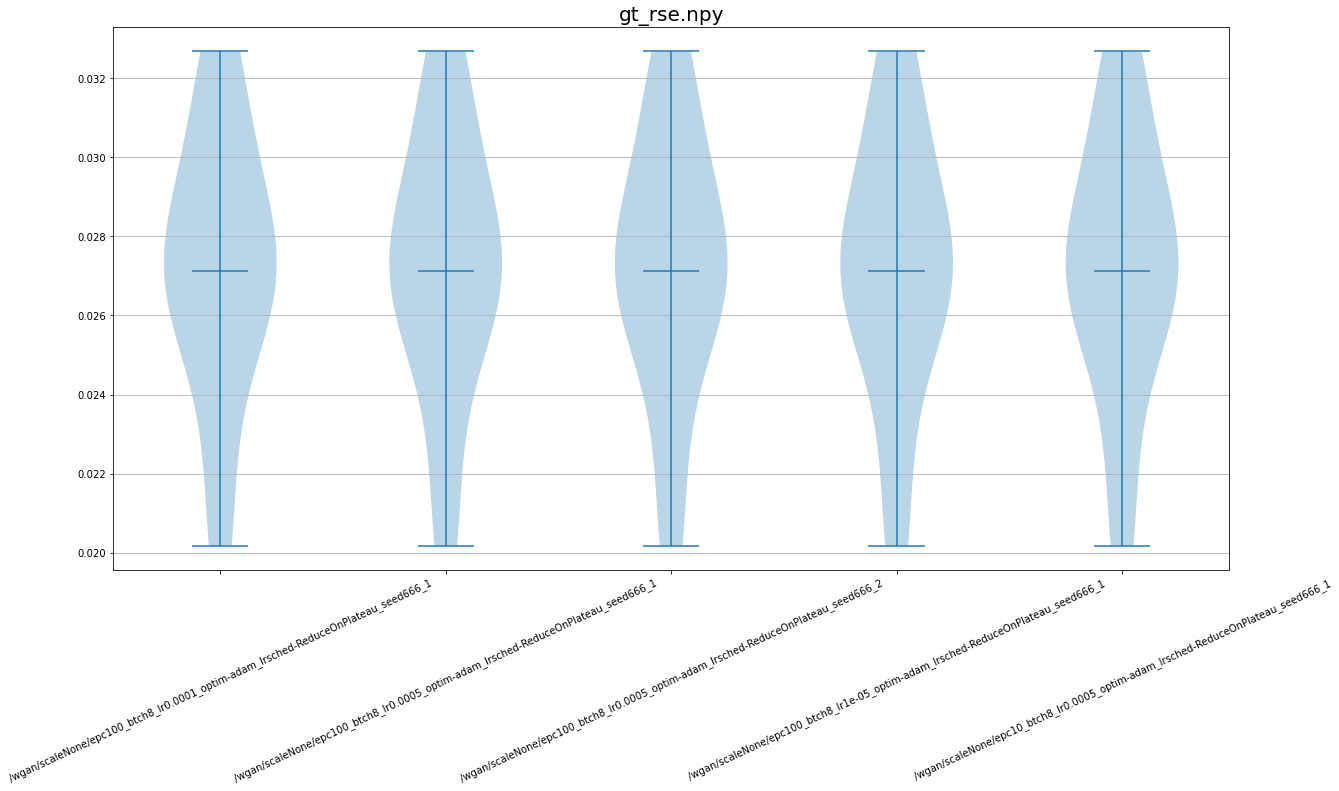

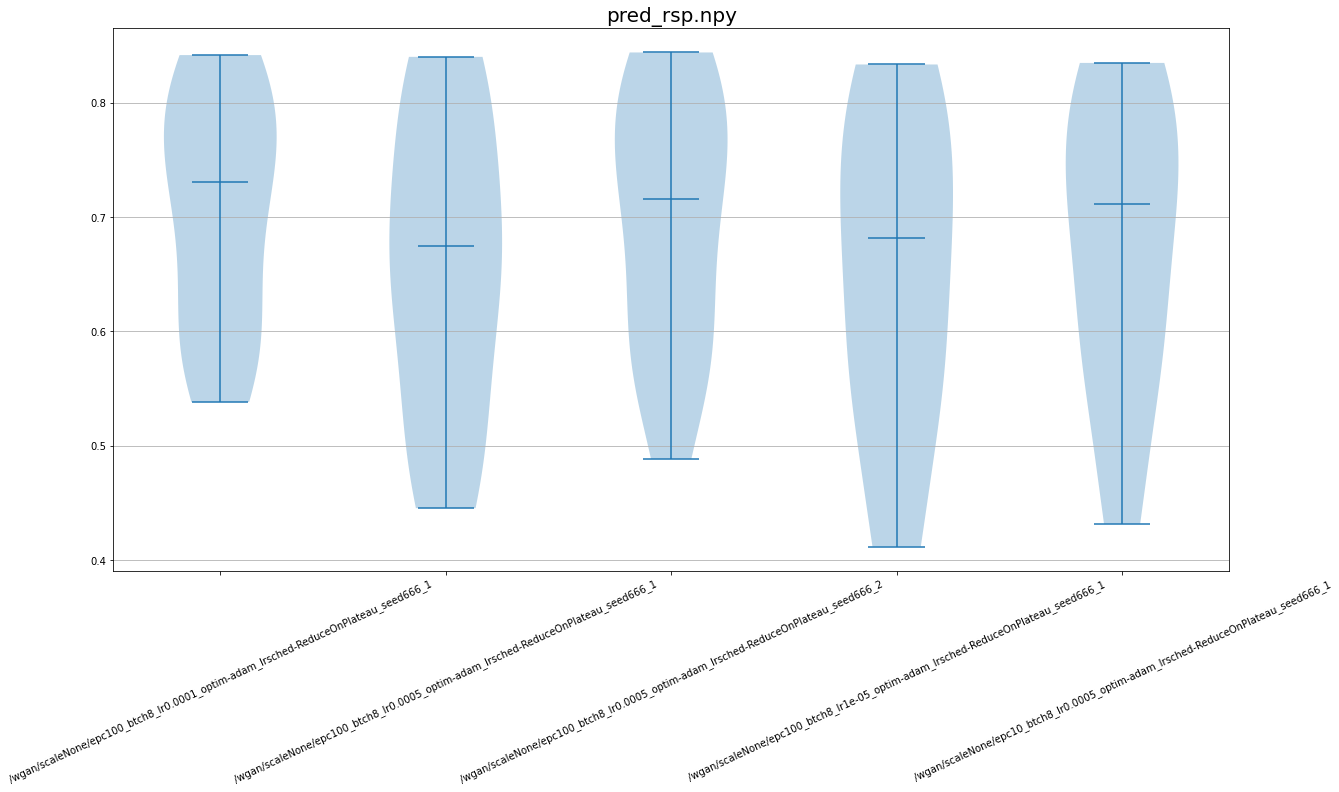

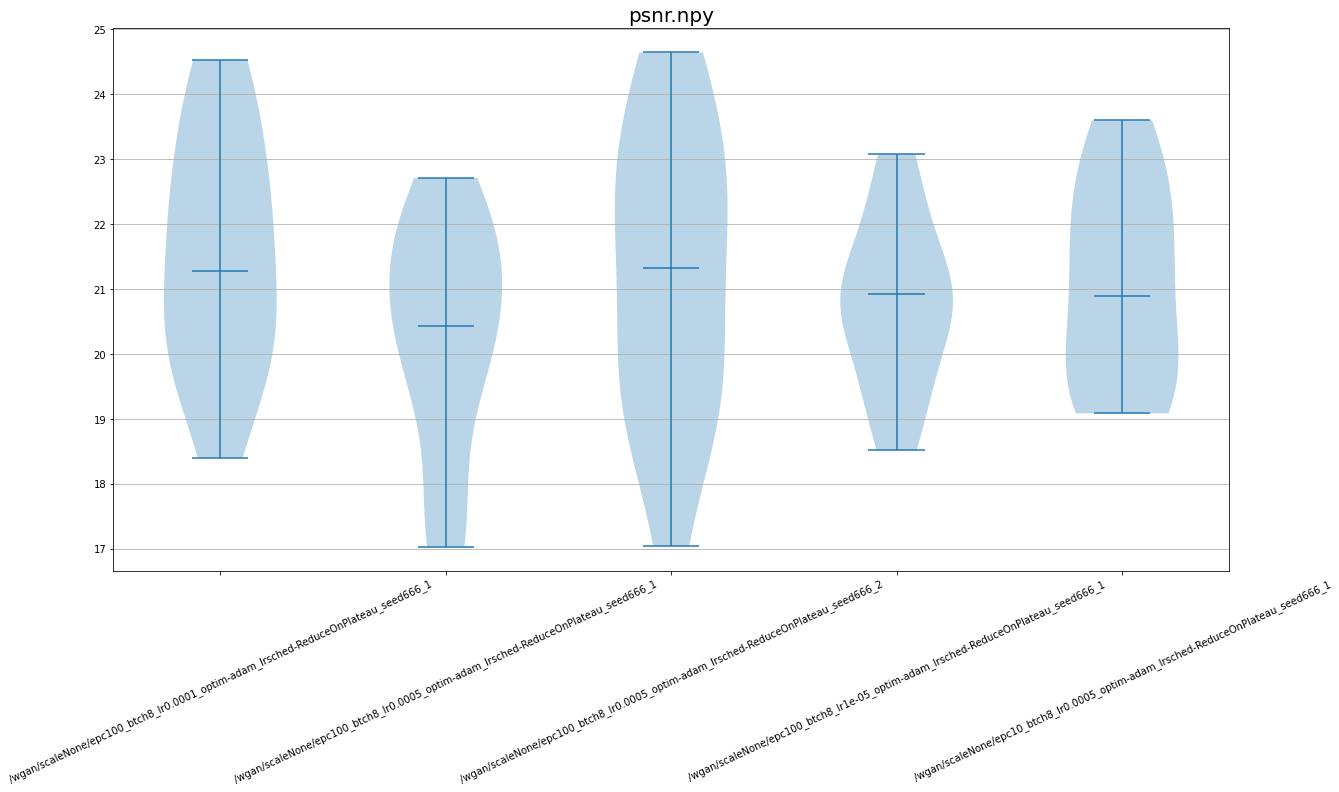

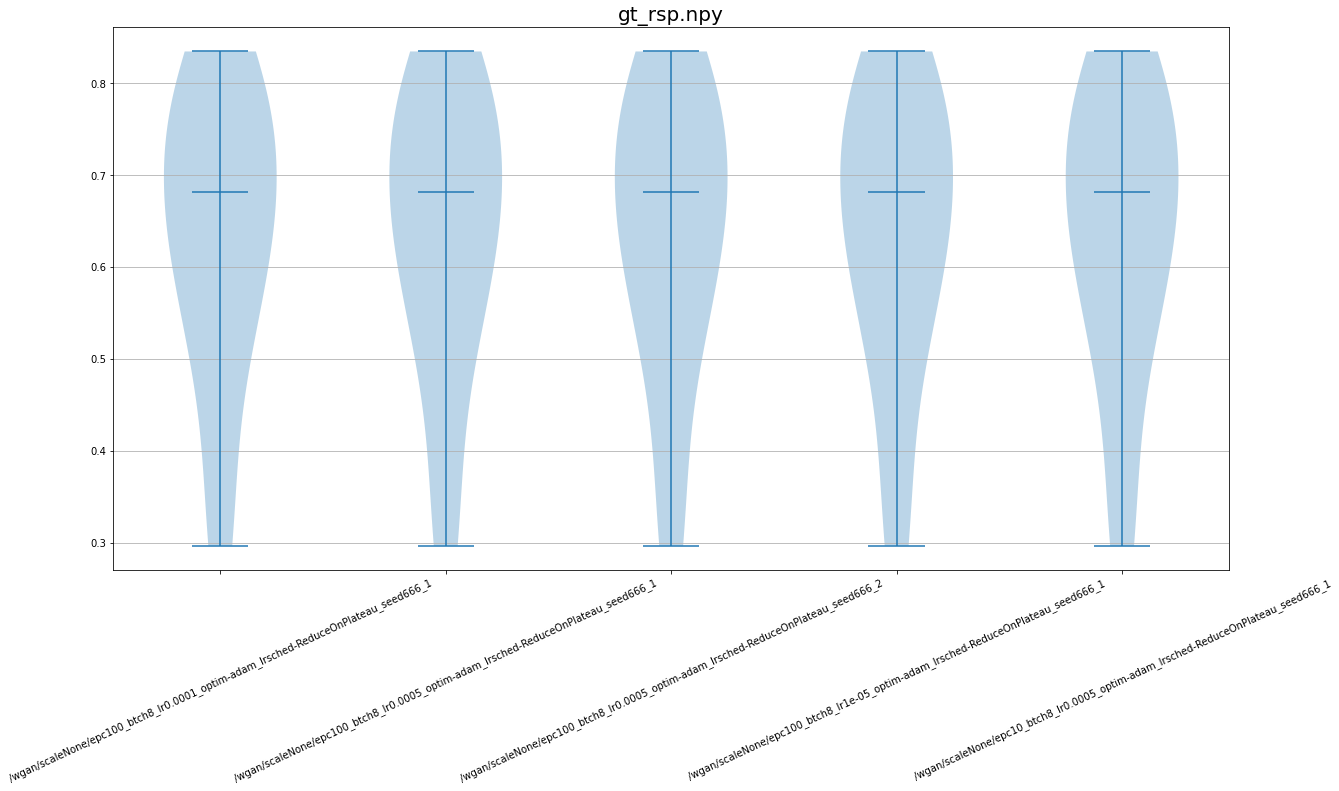

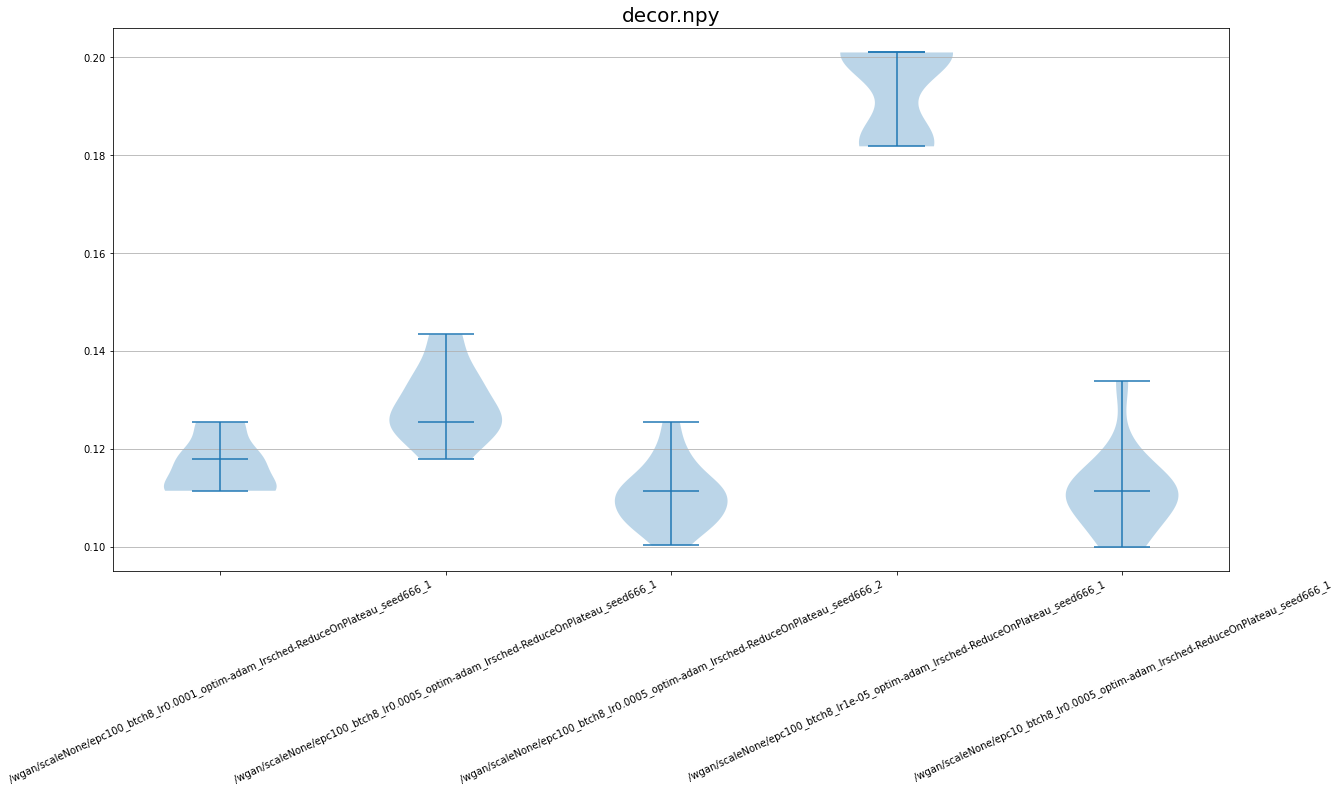

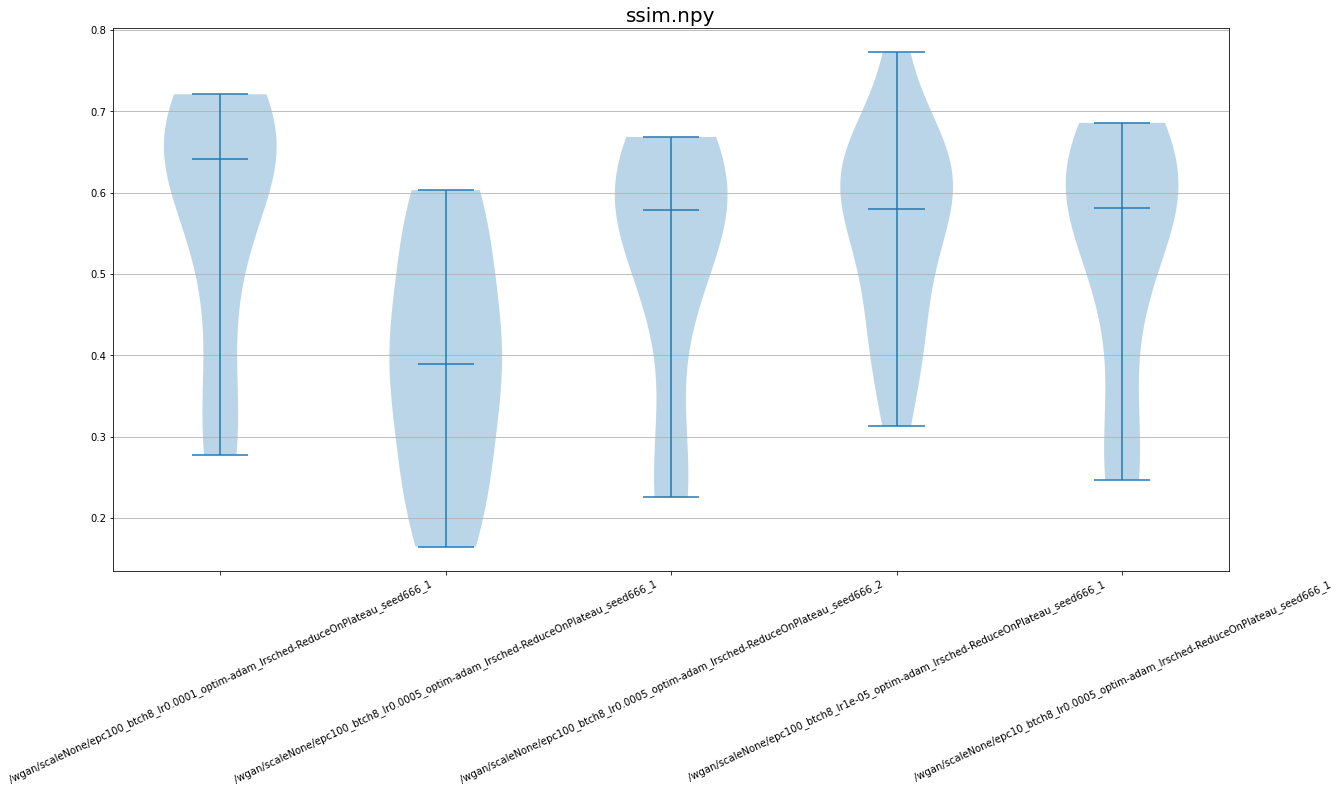

In [7]:
for metric_name in os.listdir(os.path.join(config, 'test_metrics')):
    all_metrics = [] 
    dataset_names = []
    for config in config_path_list:
        if 'ReduceOnPlateau' in config:
            
            metric_path = os.path.join(config, 'test_metrics', metric_name)
            metric = np.load(metric_path)
            all_metrics.append(metric)
            dataset_names.append(config[30:])

    plt.figure(figsize=(20,10))
    plt.violinplot(all_metrics,
                    showmeans=False,
                    showmedians=True)
    plt.grid(axis='y')
    plt.xticks(range(1, len(dataset_names) + 1), dataset_names, rotation=25)
    plt.title(metric_name, fontsize=20)
    plt.show()